# Conception d'une application au service de la santé publique
## Contexte
Je souhaite participer à l'appel à projets de l'agence de santé publique avec ma proposition d'application pour l'amélioration de l'alimentation des personnes atteintes de Leucinose.
## Idée d'application
L'idée d'application, avec test de faisabilité, portera sur un soutien aux personnes atteintes de leucinose.

La leucinose est une maladie congénitale. Elle est due au déficit d'un enzyme (l'alpha-cétodécarboxylase) utile au métabolisme des acides aminés à chaine ramifiée (leucine, valine, isoleucine). Le **traitement de la leucinose est uniquement diététique** et consiste à limiter l'apport en protéines (particulièrement en ces 3 acides aminés) : en pratique cela consiste à limiter la consommation des voandes, poissons, oeufs, légumineuses (protéagineuses et oléagineusees).

L'application sera dans un premier temps, un moteur de recommandation : à partir de la recherche d'un produit ou du scan du code barre, l'application proposera une liste de produits similaires, plus sains, moins transformés et classés par la teneur croissante en en protéines, après interrogation de la base de données d'Open Food Facts.

Pour réaliser cette application, les informations suivantes sont indispensables :
- La teneur en protéine des aliments ;
- Le Nutriscore : important pour une alimentation générale saine ;
- La présence d'additifs dans un aliment : les additifs peuvent altérer le métabolisme et les fonctions physiologiques du corps. Les personnes atteintes de leucinose ayant un trouble métabolique, doivent éviter les additifs potentiellement dangereux.

##### Mon objectif :
* Traiter et analyser le jeu de données fournit par Open Food Facts et disponible à cette adresse : https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip ;
* Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée ; 
* Rediger un rapport.
Mon travail sera reparti en trois parties séparées en deux notebooks et un powerpoint:
* Partie 1 : Notebook de nettoyage des données ;
* Partie 2 : Notebook de l'analyse des données ;
* Partie 3 : Rapport
# Partie 1 : Nettoyage des données
## 1. Importation des librairies et description du jeu de données
### 1.1. Importation des librairies et options utiles

In [1]:
# Librairies importées au début du travail
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
pd.set_option("display.max_columns", None) 
# librairies importées au fur et à mesure de l'avancé dans l'exploration des données

### 1.2. Chargement du jeu de données 

In [2]:
food_data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

### 1.3 Description du jeu de données

In [3]:
# Affichage des 5 premières lignes
food_data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   États-Unis  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2   États-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3   États-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
4   États-Unis                                    Organic polenta       NaN   

  allergens_fr traces traces_tags traces_fr     serving_size 

In [4]:
# Affichage d'un bref résumé des informations du jeu de données
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Le jeu de données contient 320.772 lignes et 106 colonnes :
- Chaque ligne correspond à un produit alimentaire et à chaque produit correspond un code ;
- Dans les colonnes on retrouve les informations relatives à chaque produit : valeurs nutritionnelles, nom, catégories.

Les variables sont de types float (variables quantitatives) et object (variables qualitatives).

In [5]:
# description des variables quantitatives
food_data.describe(include=[np.number])

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

**_Note 1 :_**
- Certains nutriments ont des quantités négatives : comme le sucre dont la valeur minimale pour 100 g est -17,86. ce qui est impossible ;
- Certaines valeurs pour les variables "..._100g" contiennent plus que 100g ;
- Plusieurs colonnes renseignes les mêmes informations (brand, nutriscore, countries...) ;
- Les noms des variables contiennent des tirets ("-"). Ce caractère n'est pas recommandé en python. Je les remplacerais par des tirets_bas ("_").

In [6]:
# description des variables qualitatives
food_data.describe(include=[object])

code                                                url  \
count          320749                                             320749   
unique         320749                                             320749   
top     0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
freq                1                                                  1   

                creator   created_t      created_datetime last_modified_t  \
count            320770      320769                320763          320772   
unique             3535      189567                189568          180495   
top     usda-ndb-import  1489077120  2017-03-09T10:37:09Z      1439141742   
freq             169868          20                    20              33   

       last_modified_datetime product_name  \
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   

                                             generic_name quantity packaging  \
count                                               52795   104819     78960   
unique                                              38584    13826     14547   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g    Carton   
freq                                                  201     4669      2153   

          packaging_tags     brands brands_tags  \
count              78961     292360      292352   
unique             12064      58784       50253   
top     sachet,plastique  Carrefour   carrefour   
freq                3959       2978        3149   

                                        categories  \
count                                        84410   
unique                                       36982   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                           301   

                                          categories_tags  \
count                                               84389   
unique                                              21142   
top     en:sugary-snacks,en:biscuits-and-cakes,en:bisc...   
freq                                                  802   

                                     categories_fr origins origins_tags  \
count                                        84411   22190        22153   
unique                                       21152    4840         4372   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits  France       france   
freq                                           802    5171         5303   

       manufacturing_places manufacturing_places_tags  \
count                 36501                     36495   
unique                 7308                      6736   
top                  France                    france   
freq                   9371                      9451   

                                                   labels  \
count                                               46559   
unique                                              18114   
top     Organic, EU Organic, fr:AB Agriculture Biologique   
freq                                                 3223   

                                              labels_tags  \
count                                               46644   
unique                                              13653   
top     en:organic,en:eu-organic,fr:ab-agriculture-bio...   
freq                                                 5311   

                                         labels_fr   emb_codes emb_codes_tags  \
count                                        46666       29306          29303   
unique                                       13655        8462           8158   
top     Bio,Bio européen,AB Agriculture Biologique  EMB 56251E     emb-56251e   
freq                                          5311         218            218   

       first_packaging_code_geo cities            cities_tags purchase_places  \
count                   

Pour les variables "code" et "url", il y a une différence entre le nombre de valeurs et les valeurs uniques. Cela laisse envisager la présence de doublons.

In [7]:
# Verification des doublons
food_data[["code", "url"]].duplicated().sum()

22

Il y a 22 doublons pour la variable code c'est-à-dire qu'il y a 22 produits qui portent le même code.

In [8]:
# identification des doublons
doublon_code = food_data[food_data.duplicated(['code'], keep=False)]
doublon_code

code  url                                            creator  \
189068  NaN  NaN                  villecomtal-sur-arros-gers-france   
189103  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189109  NaN  NaN                  villecomtal-sur-arros-gers-france   
189119  NaN  NaN                  villecomtal-sur-arros-gers-france   
189152  NaN  NaN                  villecomtal-sur-arros-gers-france   
189160  NaN  NaN                  villecomtal-sur-arros-gers-france   
189162  NaN  NaN                  villecomtal-sur-arros-gers-france   
189168  NaN  NaN                  villecomtal-sur-arros-gers-france   
189242  NaN  NaN                  villecomtal-sur-arros-gers-france   
189244  NaN  NaN                  villecomtal-sur-arros-gers-france   
189248  NaN  NaN                  villecomtal-sur-arros-gers-france   
189250  NaN  NaN                  villecomtal-sur-arros-gers-france   
189260  NaN  NaN                  villecomtal-sur-arros-gers-france   
189262  NaN  NaN                  villecomtal-sur-arros-gers-france   
189269  NaN  NaN                  villecomtal-sur-arros-gers-france   
189272  NaN  NaN                  villecomtal-sur-arros-gers-france   
189345  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189362  NaN  NaN                  villecomtal-sur-arros-gers-france   
189364  NaN  NaN                  villecomtal-sur-arros-gers-france   
189379  NaN  NaN                  villecomtal-sur-arros-gers-france   
189404  NaN  NaN                  villecomtal-sur-arros-gers-france   
189406  NaN  NaN                  villecomtal-sur-arros-gers-france   
189417  NaN  NaN                  villecomtal-sur-arros-gers-france   

                                    created_t           created_datetime  \
189068                                 France                        NaN   
189103       Villecresnes,Villeurbanne,France                Dia,Sogeres   
189109                                 France                        NaN   
189119                          Veynes,France                     SuperU   
189152                        Torcy 77,France                  Carrefour   
189160                                 France                        NaN   
189162                    Saint-Priest,France                     Auchan   
189168                                    NaN                        NaN   
189242            Villers Bocage 80260,France           Carrefour market   
189244            Villers Bocage 80260,France           Carrefour market   
189248                                    NaN                        NaN   
189250                          Veynes,France             SuperU,Leclerc   
189260                            Montgermont                       Spar   
189262            Villers Bocage 80260,France         Banque alimentaire   
189269                                 France                    Leclerc   
189272                    Marseille 5°,France             Auchan,Super U   
189345                France,Nantes,Carquefou  Super U,Leclerc,Carrefour   
189362                                 France                        NaN   
189364                      Courrières,France                       Cora   
189379                                    NaN                        NaN   
189404  Brétigny-sur-Orge,Marseille 5°,France             Auchan,Super U   
189406                    Marseille 5°,France                    Super U   
189417                                 France                        NaN   

                        last_modified_t               last_modified_datetime  \
189068                  Belgique,France                 en:belgium,en:france   
189103                           France                            en:france   
189109  Belgique,France, en:switzerland  en:belgium,en:france,en:switzerland   
189119                           France                            en:france   
189152                           France                            en:france 

**_Note  2 :_** les doublons identifiés sont en fait des produits pour lesquels aucun code et informations relatifs aux produits ne sont renseignés. Ces produits seront supprimés lors du nettoyage.

**_Combien de valeurs manquantes dans ce jeu de données ?_**

In [9]:
# calcul du nombre de valeurs manquantes
nb_NaN = food_data.isnull().sum().sum()
# calcul du nombre de données total
nb_donnée = np.product(food_data.shape)
# calcul du pourcentage des données manquantes
pourcentage_NaN = round((nb_NaN/nb_donnée)*100, 2)
print(nb_NaN, "valeurs manquantes pour", nb_donnée, "données, soit", pourcentage_NaN, "% de données manquantes")

39608589 valeurs manquantes pour 51965064 données, soit 76.22 % de données manquantes


In [10]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = food_data.isnull().sum()
pourcentage = (100 * valeur_manquante) / len(food_data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

Le taux de remplissage global du jeu de données est : 23.78%


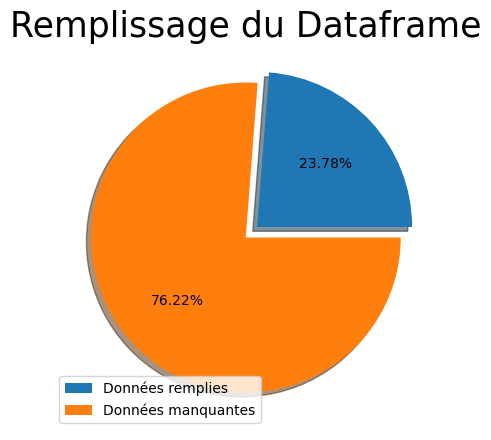

In [11]:
def taux_remplissage(food_data):
    # Quel est le nombre de valeurs non manquantes dans le jeu de données
    valeur_reel = food_data.count().sum()
    
    # nombre de lignes et de colonnes du jeu de données
    nombre_ligne, nombre_colonne = food_data.shape
    
    # calcul du taux de remplissage
    taux_remplissage = valeur_reel / (nombre_ligne * nombre_colonne) 
    print("Le taux de remplissage global du jeu de données est : {:.2%}".format(taux_remplissage))
    
    # Définition des fréquences et des légendes pour la visualisation graphique
    frequences = [taux_remplissage, 1 - taux_remplissage]
    légendes = ["Données remplies", "Données manquantes"]
    
    # paramètre du graphe
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Remplissage du Dataframe", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0) 
    ax.pie(frequences,
           explode=explode,
           # labels=légendes,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(légendes)

taux_remplissage(food_data)

#### _Conclusion_
- Le jeu de données comporte 76,22% valeurs manquantes ;
- 22 doublons ont été identifiés ;
- Les caractères tels que les tirets seront à supprimer ;
- Plusieurs valeurs aberrantes ont été identifiées sur les variables relatives aux informations nutritionnelles.

Procédons au nettoyage du jeu de données.

## 2. Nettoyage et sélection des variables pertinentes

### 2.1. Traitement des valeurs manquantes

**_Répartition des valeurs par variables_**

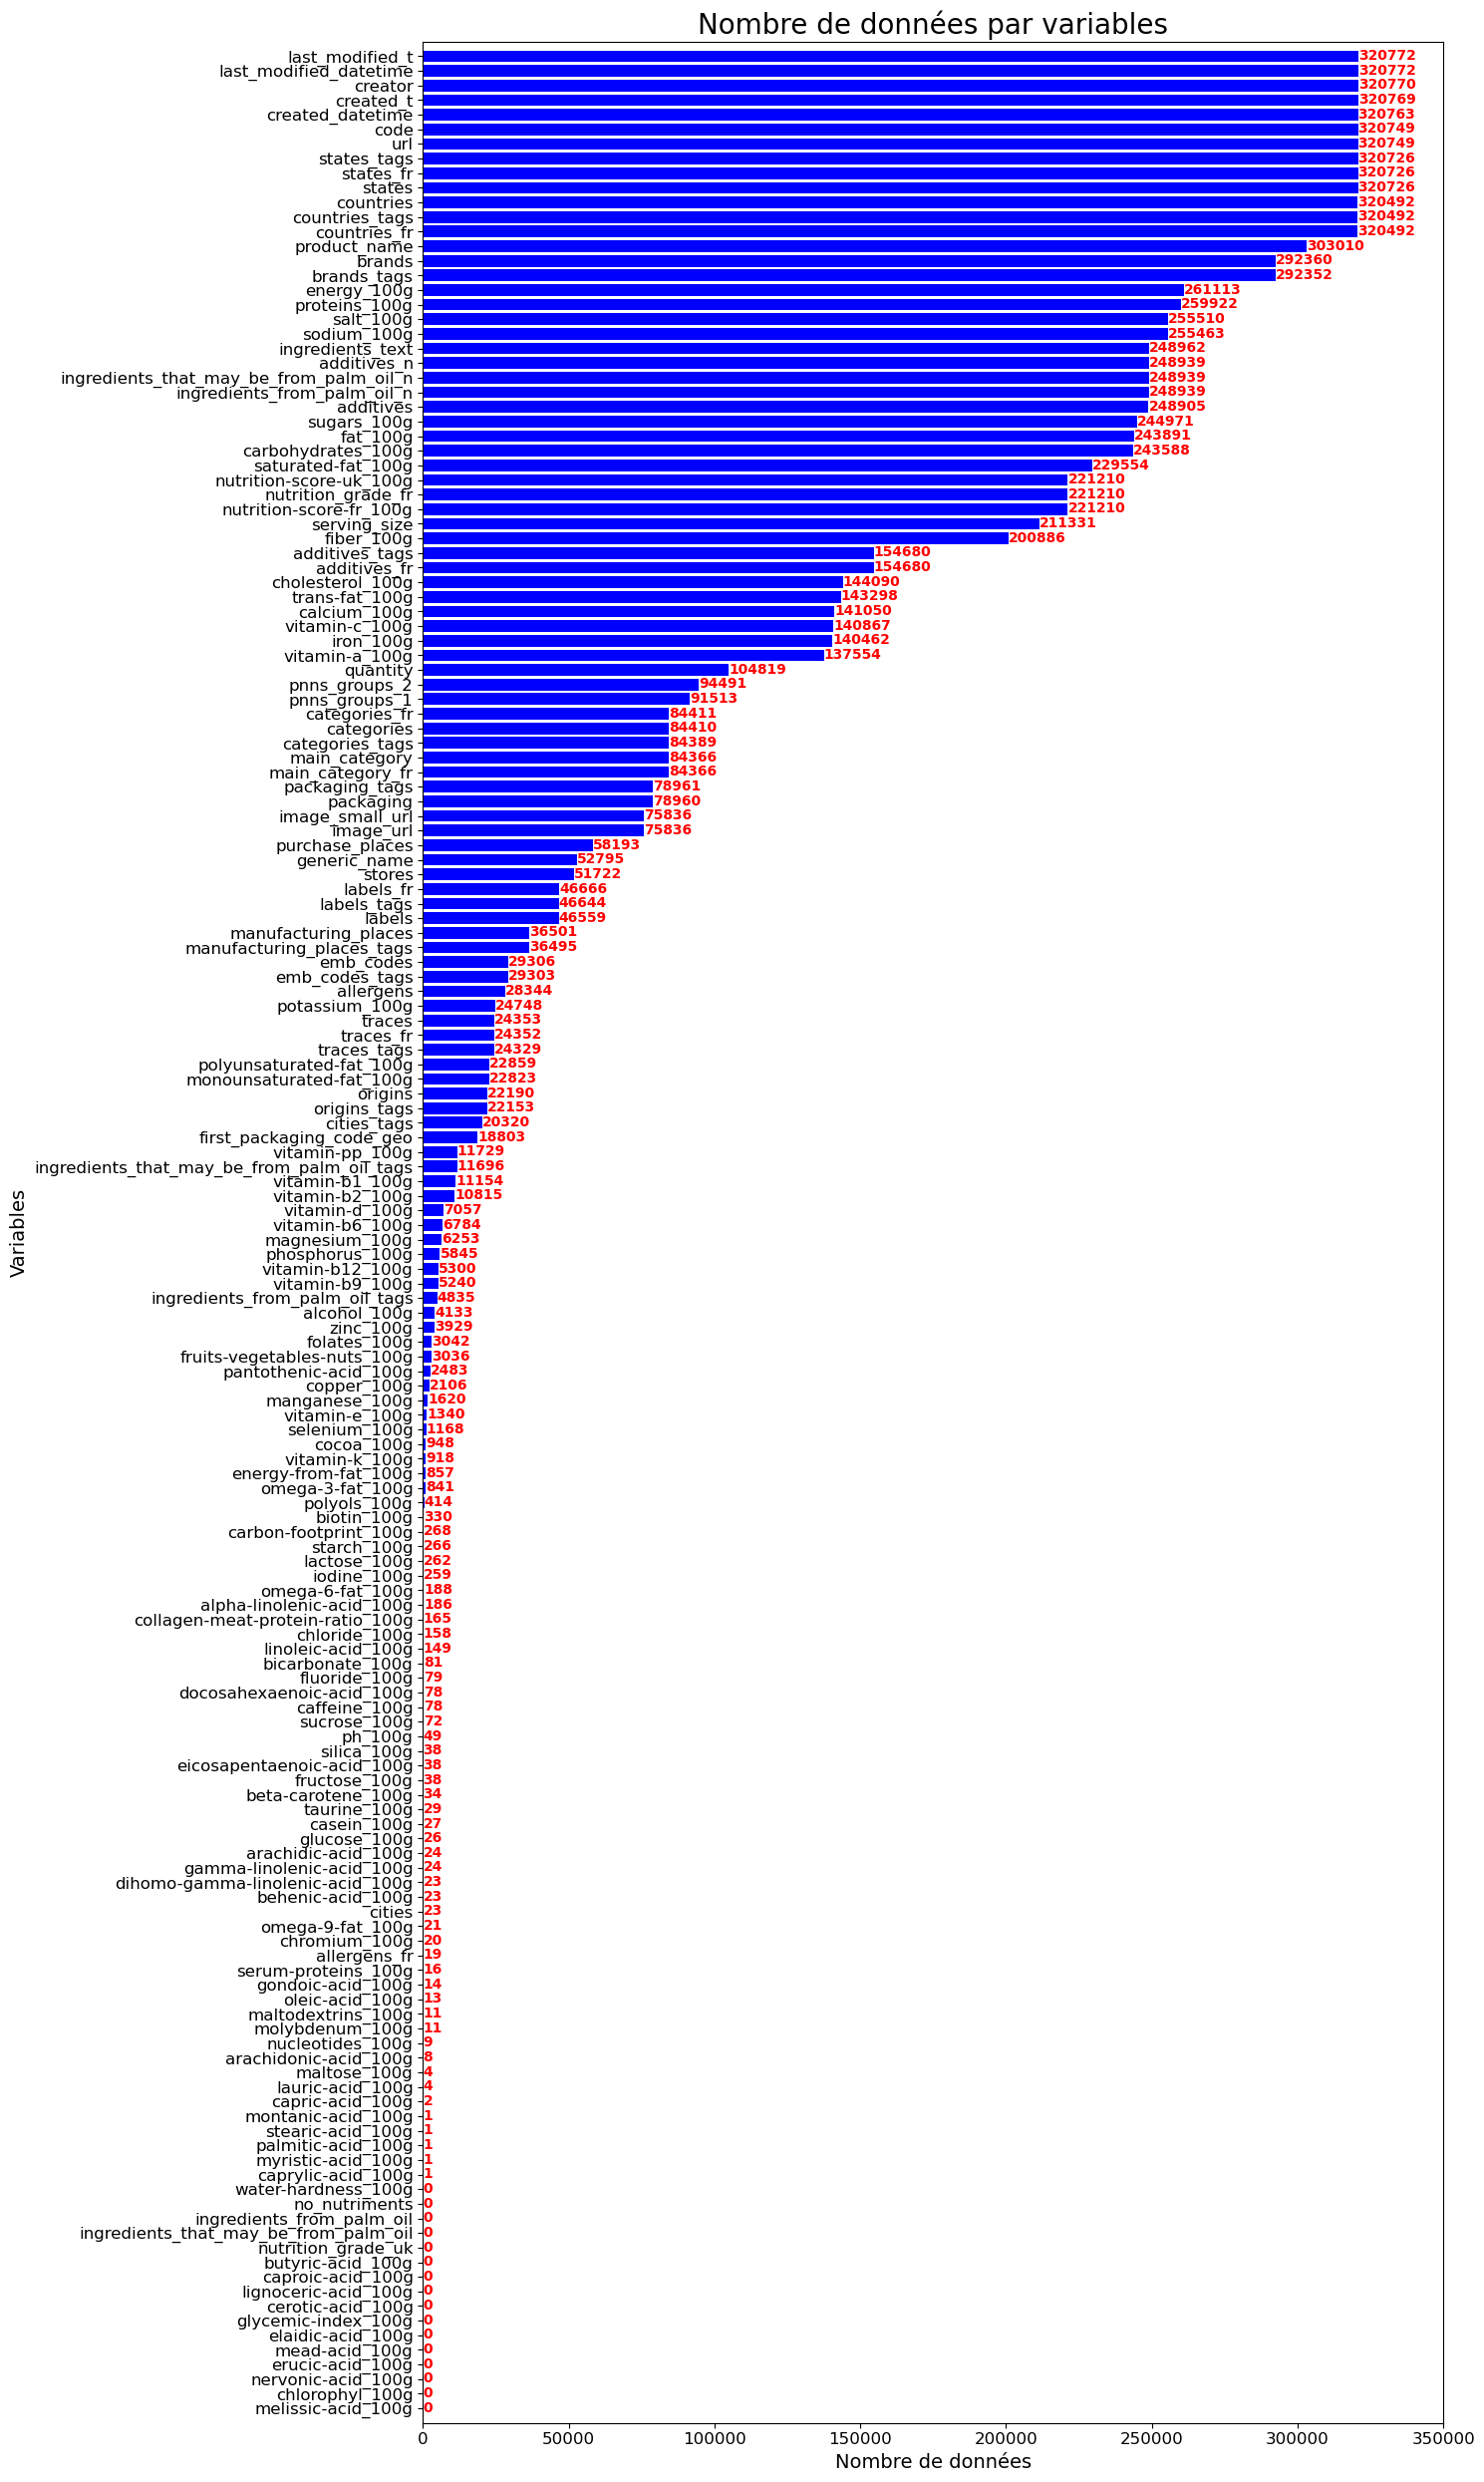

In [12]:
fig, ax = plt.subplots(figsize=(15, 25))

renseignée = food_data.count()
renseignée.sort_values(inplace=True)
ax.barh(y=renseignée.index, width=renseignée.values, color="blue")
for i, v in enumerate(renseignée):
    ax.text(v + 5, i - .25, str(v), color="red",
            fontsize=10, fontweight="bold")
ax.set_title("Nombre de données par variables", fontsize=20)
ax.set_xlabel("Nombre de données", fontsize=14)
ax.set_ylabel("Variables", fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xlim([0, 350000])
ax.set_ylim([-1, 162])
ax.grid(False)
fig.tight_layout()
plt.show()

**_Suppression des variables ne comptenant aucune valeur renseignée_**

In [13]:
food_data = food_data.dropna(axis=1, how='all')

In [14]:
food_data.shape

(320772, 146)

Le jeu de données contient désormais 146 colonnes (contre 162 au départ).

### 2.2. Suppression des tirets et doublons

In [15]:
# Suppression des tirets dans les noms des variables
food_data.columns = food_data.columns.str.replace("-", "_")
food_data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits_vegetables_nuts_100g', 'collagen_meat_protein_ratio_100g',
       'cocoa_100g', 'carbon_footprint_100g', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g'],
      dtype='object', length=146)

In [16]:
### Suppression des doublons (noté dans la colonne "code")
food_data.drop_duplicates(subset="code", keep=False, inplace=True)

In [17]:
food_data.shape

(320749, 146)

Au départ nous avions 320772 lignes pour 162 variables. Après ce premier nettoyage, nous avons 320749 lignes pour 146 variables. Avant de pousuivre le nettoyage, nous procédons à la sélection des variables pertinentes pour ce projet.
### 2.3. Pré-sélection des variables pertinentes
Le traitement de la leucinose repose sur le suivi d'une alimentation saine, équilibrée , pauvre en protéines et peu ou pas transformé. Les variables de notre jeu de données contenant les valeurs qui répondent à ces critères sont :
- Le nutriscore (et le nutrigrade) ;
- Alimentation équilibrée : les macronutriments (et particulièrement les protéines) et les micronutriments ;
- Les additifs ;

Plusieurs colonnes renseignent les mêmes informations. Nous comparerons ces colonnes entre elles pour faire un choix.

In [18]:
# Affichage de toutes les colonnes
print(food_data.columns.to_list())

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'ima

**_Nous allons scinder ces variables en 3 groupes_**
- Groupe 1 : variables apportant des informations générales ;
- Groupe 2 : variables relatives aux informations nutritionnelles ;
- Groupe 3 : variables relatives à une alimentation saine.

##### a) Informations générales

**_Comparaison entre "product_name" et "generic_name"_**

In [19]:
food_data[["product_name", "generic_name"]].notnull().sum()

product_name    302987
generic_name     52773
dtype: int64

La variable "generic name" contient seulement 16% de valeurs renseignées contre 95% pour la variable "product name".<br>
Conclusion : on conserve uniquement la variable "product name"

**_Comparaison entre "brands" et "brands_tags"_**

In [20]:
food_data[['brands', 'brands_tags']].notnull().sum()

brands         292360
brands_tags    292352
dtype: int64

In [21]:
# Les deux variables  ont à peu près le même taux de remplissage. Dans quelle variable les valeurs sont le mieux renseignées ?
food_data[['brands', 'brands_tags']].head(50)

brands                     brands_tags
0                    Ferme t'y R'nao                 ferme-t-y-r-nao
1                                NaN                             NaN
2                     Torn & Glasser                    torn-glasser
3                          Grizzlies                       grizzlies
4                     Bob's Red Mill                  bob-s-red-mill
5                               Unfi                            unfi
6                           Lundberg                        lundberg
7                     Daddy's Muesli                  daddy-s-muesli
8                     Equal Exchange                  equal-exchange
9               Napa Valley Naturals            napa-valley-naturals
10                              Unfi                            unfi
11                        Gardentime                      gardentime
12                          Sunridge                        sunridge
13                              Unfi                            unfi
14                              Eden                            eden
15                         Grizzlies                       grizzlies
16                         Grizzlies                       grizzlies
17                              Unfi                            unfi
18                              Unfi                            unfi
19                               Pcc                             pcc
20                          Sunridge                        sunridge
21                          Sunridge                        sunridge
22                          Sunridge                        sunridge
23                          Sunridge                        sunridge
24                          Sunridge                        sunridge
25                           Redmond                         redmond
26              New England Naturals            new-england-naturals
27                          Sunridge                        sunridge
28                          Sunridge                        sunridge
29                          Sunridge                        sunridge
30                              Unfi                            unfi
31                               Pcc                             pcc
32                          Sunridge                        sunridge
33                         Grizzlies                       grizzlies
34              New England Naturals            new-england-naturals
35                          Sunridge                        sunridge
36  Wholesome,  Wholesome Sweeteners  wholesome,wholesome-sweeteners
37                         Grizzlies                       grizzlies
38                         Grizzlies                       grizzlies
39                              Unfi                            unfi
40                    Bluebird Grain                  bluebird-grain
41                    Bluebird Grain                  bluebird-grain
42                         Grizzlies                       grizzlies
43                          Sunridge                        sunridge
44                         Grizzlies                       grizzlies
45                              Unfi                            unfi
46                               NaN                             NaN
47                               NaN                             NaN
48                               NaN                             NaN
49          Crown Pacific Fine Foods        crown-pacific-fine-foods

Conclusion : On conserve la variable "brands" car, les valeurs y sont mieux renseignées.

**_Comparaison entre "categories", "categories_tags" et "categories_fr"_**

In [22]:
food_data[['categories', 'categories_tags', 'categories_fr',]].notnull().sum()

categories         84389
categories_tags    84389
categories_fr      84389
dtype: int64

In [23]:
# Les 3 variables ont le même taux de remplissage. Trouvons la variable la mieux renseignée.
# Création d'une fonction pour la comparaison de plusieurs variables
def comparaison_colonne(col_1, col_2, col_3, df):
    condition_1= df[col_1] != df[col_2]
    condition_2 = df[col_1] != df[col_3]
    df_equal = df[condition_1 | condition_2]
    df_equal = df_equal[[col_1, col_2, col_3]][df_equal[col_1].notnull()]
    return df_equal

In [24]:
comparaison_colonne('categories', 'categories_tags', 'categories_fr', food_data)

categories  \
46                                          Filet de bœuf   
174                                      Légumes-feuilles   
175         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
177     Plant-based foods and beverages,Plant-based fo...   
180         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
...                                                   ...   
320762                                          pl:Szprot   
320763                                         thés verts   
320765  Viandes,Produits à tartiner,Charcuteries,Produ...   
320766                                            Peanuts   
320769                                       Potato chips   

                                          categories_tags  \
46                                      fr:filet-de-boeuf   
174     en:plant-based-foods-and-beverages,en:plant-ba...   
175     en:sugary-snacks,en:biscuits-and-cakes,en:past...   
177     en:plant-based-foods-and-beverages,en:plant-ba...   
180     en:sugary-snacks,en:biscuits-and-cakes,en:past...   
...                                                   ...   
320762                                          pl:szprot   
320763  en:plant-based-foods-and-beverages,en:beverage...   
320765  en:meats,en:spreads,en:prepared-meats,en:salte...   
320766  en:plant-based-foods-and-beverages,en:plant-ba...   
320769  en:salty-snacks,en:appetizers,en:chips-and-fri...   

                                            categories_fr  
46                                         Filet-de-boeuf  
174     Aliments et boissons à base de végétaux,Alimen...  
175         Snacks sucrés,Biscuits et gâteaux,Pâtisseries  
177     Aliments et boissons à base de végétaux,Alimen...  
180         Snacks sucrés,Biscuits et gâteaux,Pâtisseries  
...                                                   ...  
320762                                          pl:Szprot  
320763  Aliments et boissons à base de végétaux,Boisso...  
320765  Viandes,Produits à tartiner,Charcuteries,Produ...  
320766  Aliments et boissons à base de végétaux,Alimen...  
320769  Snacks salés,Apéritif,Chips et frites,Chips,Ch...  

[84387 rows x 3 columns]

Conclusion : les catégories alimentaires sont mieux renseignées dans la variable "categories_fr", on la conserve.

**_Comparaison entre "pnns_groups_1" et "pnns_groups_2"_**

In [25]:
pnns = food_data[food_data['pnns_groups_1'] != food_data['pnns_groups_2']]
pnns = pnns[["pnns_groups_1", "pnns_groups_2"]][pnns["pnns_groups_1"].notnull()]
pnns.head(50)

pnns_groups_1          pnns_groups_2
174    Fruits and vegetables             Vegetables
175            Sugary snacks     Biscuits and cakes
177     Cereals and potatoes                  Bread
180            Sugary snacks     Biscuits and cakes
182     Cereals and potatoes                Legumes
184            Sugary snacks     Biscuits and cakes
185          Composite foods  Pizza pies and quiche
186           Fish Meat Eggs                   Meat
187            Sugary snacks                 Sweets
188                Beverages  Non-sugared beverages
218            Sugary snacks                 Sweets
223            Sugary snacks     Biscuits and cakes
226                Beverages    Sweetened beverages
236    Fruits and vegetables             Vegetables
239           Fat and sauces   Dressings and sauces
240                Beverages    Sweetened beverages
242            Sugary snacks     Biscuits and cakes
259    Fruits and vegetables             Vegetables
279            Sugary snacks     Biscuits and cakes
283            Sugary snacks     Biscuits and cakes
284           Fish Meat Eggs                   Meat
299            Sugary snacks     Biscuits and cakes
301            Sugary snacks     Biscuits and cakes
360            Sugary snacks                 Sweets
361            Sugary snacks                 Sweets
362            Sugary snacks                 Sweets
414    Fruits and vegetables             Vegetables
415                Beverages    Sweetened beverages
428            Sugary snacks     Biscuits and cakes
454            Sugary snacks     Biscuits and cakes
458            Sugary snacks     Biscuits and cakes
459            Sugary snacks     Biscuits and cakes
463          Composite foods         One-dish meals
468           Fat and sauces   Dressings and sauces
479          Composite foods         One-dish meals
494    fruits-and-vegetables             vegetables
508            Sugary snacks     Biscuits and cakes
525          Composite foods  Pizza pies and quiche
564    Fruits and vegetables                  Soups
568            Sugary snacks     Chocolate products
569           Fish Meat Eggs                   Meat
579          Composite foods         One-dish meals
593    Fruits and vegetables             Vegetables
595           Fat and sauces   Dressings and sauces
596    Fruits and vegetables                 Fruits
601          Composite foods               Sandwich
628     Cereals and potatoes                Cereals
630    Fruits and vegetables                 Fruits
635     Cereals and potatoes                  Bread
637  Milk and dairy products        Milk and yogurt

"pnns_groups_1" correspond à des groupes alimentaires et "pnns_groups_2" à des sous groupes. <br> **_conclusion :_** On conserve les deux

**_Comparaison des pays_**

In [26]:
comparaison_colonne('countries', 'countries_tags', 'countries_fr', food_data).head(50)

countries     countries_tags countries_fr
0      en:FR          en:france       France
1         US   en:united-states   États-Unis
2         US   en:united-states   États-Unis
3         US   en:united-states   États-Unis
4         US   en:united-states   États-Unis
5         US   en:united-states   États-Unis
6         US   en:united-states   États-Unis
7         US   en:united-states   États-Unis
8         US   en:united-states   États-Unis
9         US   en:united-states   États-Unis
10        US   en:united-states   États-Unis
11        US   en:united-states   États-Unis
12        US   en:united-states   États-Unis
13        US   en:united-states   États-Unis
14        US   en:united-states   États-Unis
15        US   en:united-states   États-Unis
16        US   en:united-states   États-Unis
17        US   en:united-states   États-Unis
18        US   en:united-states   États-Unis
19        US   en:united-states   États-Unis
20        US   en:united-states   États-Unis
21        US   en:united-states   États-Unis
22        US   en:united-states   États-Unis
23        US   en:united-states   États-Unis
24        US   en:united-states   États-Unis
25        US   en:united-states   États-Unis
26        US   en:united-states   États-Unis
27        US   en:united-states   États-Unis
28        US   en:united-states   États-Unis
29        US   en:united-states   États-Unis
30        US   en:united-states   États-Unis
31        US   en:united-states   États-Unis
32        US   en:united-states   États-Unis
33        US   en:united-states   États-Unis
34        US   en:united-states   États-Unis
35        US   en:united-states   États-Unis
36        US   en:united-states   États-Unis
37        US   en:united-states   États-Unis
38        US   en:united-states   États-Unis
39        US   en:united-states   États-Unis
40        US   en:united-states   États-Unis
41        US   en:united-states   États-Unis
42        US   en:united-states   États-Unis
43        US   en:united-states   États-Unis
44        US   en:united-states   États-Unis
45        US   en:united-states   États-Unis
46    France          en:france       France
47     en:GB  en:united-kingdom  Royaume-Uni
48     en:FR          en:france       France
49        US   en:united-states   États-Unis

**_Conclusion_** : on conserve countries_fr

In [27]:
comparaison_colonne('states', 'states_tags', 'states_fr', food_data).head(50)

states  \
0   en:to-be-completed, en:nutrition-facts-to-be-c...   
1   en:to-be-completed, en:nutrition-facts-complet...   
2   en:to-be-completed, en:nutrition-facts-complet...   
3   en:to-be-completed, en:nutrition-facts-complet...   
4   en:to-be-completed, en:nutrition-facts-complet...   
5   en:to-be-completed, en:nutrition-facts-complet...   
6   en:to-be-completed, en:nutrition-facts-complet...   
7   en:to-be-completed, en:nutrition-facts-complet...   
8   en:to-be-completed, en:nutrition-facts-complet...   
9   en:to-be-completed, en:nutrition-facts-complet...   
10  en:to-be-completed, en:nutrition-facts-complet...   
11  en:to-be-completed, en:nutrition-facts-complet...   
12  en:to-be-completed, en:nutrition-facts-complet...   
13  en:to-be-completed, en:nutrition-facts-complet...   
14  en:to-be-completed, en:nutrition-facts-complet...   
15  en:to-be-completed, en:nutrition-facts-complet...   
16  en:to-be-completed, en:nutrition-facts-complet...   
17  en:to-be-completed, en:nutrition-facts-complet...   
18  en:to-be-completed, en:nutrition-facts-complet...   
19  en:to-be-completed, en:nutrition-facts-complet...   
20  en:to-be-completed, en:nutrition-facts-complet...   
21  en:to-be-completed, en:nutrition-facts-complet...   
22  en:to-be-completed, en:nutrition-facts-complet...   
23  en:to-be-completed, en:nutrition-facts-complet...   
24  en:to-be-completed, en:nutrition-facts-complet...   
25  en:to-be-completed, en:nutrition-facts-complet...   
26  en:to-be-completed, en:nutrition-facts-complet...   
27  en:to-be-completed, en:nutrition-facts-complet...   
28  en:to-be-completed, en:nutrition-facts-complet...   
29  en:to-be-completed, en:nutrition-facts-complet...   
30  en:to-be-completed, en:nutrition-facts-complet...   
31  en:to-be-completed, en:nutrition-facts-complet...   
32  en:to-be-completed, en:nutrition-facts-complet...   
33  en:to-be-completed, en:nutrition-facts-complet...   
34  en:to-be-completed, en:nutrition-facts-complet...   
35  en:to-be-completed, en:nutrition-facts-complet...   
36  en:to-be-completed, en:nutrition-facts-complet...   
37  en:to-be-completed, en:nutrition-facts-complet...   
38  en:to-be-completed, en:nutrition-facts-complet...   
39  en:to-be-completed, en:nutrition-facts-complet...   
40  en:to-be-completed, en:nutrition-facts-complet...   
41  en:to-be-completed, en:nutrition-facts-complet...   
42  en:to-be-completed, en:nutrition-facts-complet...   
43  en:to-be-completed, en:nutrition-facts-complet...   
44  en:to-be-completed, en:nutrition-facts-complet...   
45  en:to-be-completed, en:nutrition-facts-complet...   
46  en:to-be-completed, en:nutrition-facts-to-be-c...   
47  en:to-be-completed, en:nutrition-facts-complet...   
48  en:to-be-completed, en:nutrition-facts-to-be-c...   
49  en:to-be-completed, en:nutrition-facts-complet...   

                                          states_tags  \
0   en:to-be-completed,en:nutrition-facts-to-be-co...   
1   en:to-be-completed,en:nutrition-facts-complete...   
2   en:to-be-completed,en:nutrition-facts-complete...   
3   en:to-be-completed,en:nutrition-facts-complete...   
4   en:to-be-completed,en:nutrition-facts-complete...   
5   en:to-be-completed,en:nutrition-facts-complete...   
6   en:to-be-completed,en:nutrition-facts-complete...   
7   en:to-be-completed,en:nutrition-facts-complete...   
8   en:to-be-completed,en:nutrition-facts-complete...   
9   en:to-be-completed,en:nutrition-facts-complete...   
10  en:to-be-completed,en:nutrition-facts-complete...   
11  en:to-be-completed,en:nutrition-facts-complete...   
12  en:to-be-completed,en:nutrition-facts-complete...   
13  en:to-be-completed,en:nutrition-facts-complete...   
14  en:to-be-completed,en:nutrition-facts-complete...   
15  en:to-be-completed,en:nutrition-facts-complete...   
16  en:to-be-completed,en:nutrition-facts-complete...   
17  en:to-be-completed,en:nutrition-facts-complete...   
18  en:to-be-completed,en:nutrition-facts-complete...   

**_Conclusion_** : ces colonnes n'apportent aucune informations, on procède à leur suppression.

**Résumé**
On conserve les variables suivantes :
- brands ;
- categories_fr ;
- pnns_groups_1 et 2 ;
- countries_fr
- code ;
- image_url
- product_name

In [28]:
# colonnes à conserver, groupe informations générales
col_1 = [["brands", "categories_fr", "pnns_groups_1", "pnns_groups_2", "countries_fr", "code", "image_url", "product_name"]]

##### b) informations nutritionnelles

**_Comparaison des nutriscore_**

In [29]:
food_data['nutrition_score_fr_100g'].equals(food_data['nutrition_score_uk_100g'])

False

In [30]:
# Les valeurs des deux variables diffèrent les unes des autres.
# Pour identifier la meilleure variable, comparons les au nutrigrade
comparaison_colonne('nutrition_grade_fr', 'nutrition_score_fr_100g', 'nutrition_score_uk_100g', food_data)

nutrition_grade_fr  nutrition_score_fr_100g  nutrition_score_uk_100g
1                       d                     14.0                     14.0
2                       b                      0.0                      0.0
3                       d                     12.0                     12.0
7                       c                      7.0                      7.0
12                      d                     12.0                     12.0
...                   ...                      ...                      ...
320742                  a                     -1.0                     -1.0
320751                  a                     -4.0                     -4.0
320757                  b                      0.0                      0.0
320763                  c                      2.0                      0.0
320768                  b                      0.0                      0.0

[221210 rows x 3 columns]

La variable "nutrition_score_fr_100g" à une meilleure correspondance avec la variable "nutrition_grade_fr" (exemple des 320.768, 226...).

**_Conclusion :_** on conserve les variables "nutrition_score_fr_100g" et "nutrition_grade_fr", Ainsi que toutes les variables relatives aux nutriments (toutes les variables ce terminant par "_100g"

In [31]:
# colonnes conservées pour le groupe informations nutritionnelles
col_2 = ['nutrition_grade_fr', 'nutrition_score_fr_100g', 'energy_100g', 'energy_from_fat_100g', 'fat_100g', 
         'saturated_fat_100g','caprylic_acid_100g', 'capric_acid_100g', 'lauric_acid_100g', 'myristic_acid_100g', 
         'palmitic_acid_100g', 'stearic_acid_100g', 'arachidic_acid_100g', 'behenic_acid_100g', 'montanic_acid_100g', 
         'monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'omega_3_fat_100g', 'alpha_linolenic_acid_100g', 
         'eicosapentaenoic_acid_100g', 'docosahexaenoic_acid_100g', 'omega_6_fat_100g', 'linoleic_acid_100g', 
         'arachidonic_acid_100g', 'gamma_linolenic_acid_100g', 'dihomo_gamma_linolenic_acid_100g', 'omega_9_fat_100g', 
         'oleic_acid_100g', 'gondoic_acid_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
         'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 
         'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 'serum_proteins_100g', 'nucleotides_100g', 'salt_100g', 
         'sodium_100g', 'alcohol_100g', 'vitamin_a_100g', 'beta_carotene_100g', 'vitamin_d_100g', 'vitamin_e_100g', 
         'vitamin_k_100g', 'vitamin_c_100g', 'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_pp_100g', 'vitamin_b6_100g', 
         'vitamin_b9_100g', 'folates_100g', 'vitamin_b12_100g', 'biotin_100g', 'pantothenic_acid_100g', 'silica_100g', 
         'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 
         'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 
         'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits_vegetables_nuts_100g', 
         'collagen_meat_protein_ratio_100g', 'cocoa_100g', 'carbon_footprint_100g']

##### c) Alimentation saine

Comparaison des additifs

In [32]:
comparaison_colonne('additives', 'additives_tags', 'additives_fr', food_data).head(50)

additives  \
1    [ bananas -> en:bananas  ]  [ vegetable-oil -...   
2    [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...   
3    [ organic-hazelnuts -> en:organic-hazelnuts  ...   
4    [ organic-polenta -> en:organic-polenta  ]  [...   
5    [ rolled-oats -> en:rolled-oats  ]  [ oats ->...   
6    [ organic-long-grain-white-rice -> en:organic...   
7    [ org-oats -> en:org-oats  ]  [ oats -> en:oa...   
8    [ organic-chocolate-liquor -> en:organic-choc...   
9    [ organic-expeller-pressed -> en:organic-expe...   
10   [ organic-adzuki-beans -> en:organic-adzuki-b...   
11   [ organic-refined-durum-semolina-wheat-flour ...   
12   [ roasted-peanuts -> en:roasted-peanuts  ]  [...   
13   [ organic-golden-flax-seeds -> en:organic-gol...   
14   [ organic-dry-roasted-pumpkin-seeds -> en:org...   
15   [ organic-rolled-oats -> en:organic-rolled-oa...   
16   [ organic-raw-hazelnuts -> en:organic-raw-haz...   
17   [ organic-bananas -> en:organic-bananas  ]  [...   
18   [ organic-brown-jasmine-rice -> en:organic-br...   
19   [ organic-oat-groats -> en:organic-oat-groats...   
20   [ yogurt-raisins -> en:yogurt-raisins  ]  [ r...   
21   [ chocolate-stars -> en:chocolate-stars  ]  [...   
22   [ organic-rolled-oats -> en:organic-rolled-oa...   
23   [ dry-roasted-almonds -> en:dry-roasted-almon...   
24   [ peanut-butter -> en:peanut-butter  ]  [ but...   
25   [ ancient-sea-salt-with-natural-trace-mineral...   
26   [ organic-whole-rolled-oats -> en:organic-who...   
27   [ whole-cashews -> en:whole-cashews  ]  [ cas...   
28   [ cashews -> en:cashews  ]  [ curry-seasoning...   
29   [ almonds -> en:almonds  ]  [ wasabi-spice ->...   
30   [ organic-coconut -> en:organic-coconut  ]  [...   
31   [ organic-red-quinoa -> en:organic-red-quinoa...   
32   [ coconut-bar -> en:coconut-bar  ]  [ bar -> ...   
33   [ organic-semi-sweet-chocolate-chips -> en:or...   
34   [ organic-whole-rolled-oates -> en:organic-wh...   
35   [ organic-rolled-oats -> en:organic-rolled-oa...   
36   [ raw-cane-demerara-sugar -> en:raw-cane-deme...   
37   [ organic-rolled-oats -> en:organic-rolled-oa...   
38   [ organic-coconut -> en:organic-coconut  ]  [...   
39   [ organic-black-beans -> en:organic-black-bea...   
40   [ bluebird-grain-organic-grain-emmer-farro ->...   
41   [ organic-hard-red-wheat-berries -> en:organi...   
42   [ organic-rolled-oats -> en:organic-rolled-oa...   
43   [ dark-chocolate-coating -> en:dark-chocolate...   
44   [ organic-rolled-oats -> en:organic-rolled-oa...   
45   [ organic-black-chia-seeds -> en:organic-blac...   
47   [ pasteurized-free-range-egg-sugar-blueberrie...   
49   [ organic-french-green-lentils -> en:organic-...   
50   [ organic-garbanzo-beans -> en:organic-garban...   
51   [ organic-green-split-peas -> en:organic-gree...   
52   [ high-fiber -> en:high-fiber  ]  [ fiber -> ...   

                                       additives_tags  \
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                    en:e123,en:e307a   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                            en:e100   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN

**_Conclusion :_** on conserve la variable "additives_fr" qui contient moins de valeurs manquantes

**_Comparaison des allergènes_**

In [33]:
food_data['allergens'].equals(food_data['allergens_fr'])

False

In [34]:
food_data[['allergens', 'allergens_fr']].notnull().sum()

allergens       28325
allergens_fr        0
dtype: int64

**_Conclusion :_** on conserve la variable "allergens"

**_Ingédient d'huile de palme_**

In [35]:
col_3 = ['allergens', 'additives_fr']

**Variables prés-sélectionnés pour la suite du nettoyage**

In [36]:
colonnes = col_1 + col_2 + col_3
print(colonnes)

[['brands', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'countries_fr', 'code', 'image_url', 'product_name'], 'nutrition_grade_fr', 'nutrition_score_fr_100g', 'energy_100g', 'energy_from_fat_100g', 'fat_100g', 'saturated_fat_100g', 'caprylic_acid_100g', 'capric_acid_100g', 'lauric_acid_100g', 'myristic_acid_100g', 'palmitic_acid_100g', 'stearic_acid_100g', 'arachidic_acid_100g', 'behenic_acid_100g', 'montanic_acid_100g', 'monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'omega_3_fat_100g', 'alpha_linolenic_acid_100g', 'eicosapentaenoic_acid_100g', 'docosahexaenoic_acid_100g', 'omega_6_fat_100g', 'linoleic_acid_100g', 'arachidonic_acid_100g', 'gamma_linolenic_acid_100g', 'dihomo_gamma_linolenic_acid_100g', 'omega_9_fat_100g', 'oleic_acid_100g', 'gondoic_acid_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fi

**Suppression des variables non sélectionnés**

In [37]:
food_data = food_data.drop(columns=['creator', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
                                    'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 
                                    'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 
                                    'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 
                                    'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 
                                    'countries_tags', 'ingredients_text', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
                                    'serving_size','additives_tags', 'additives','ingredients_that_may_be_from_palm_oil_n', 
                                    'ingredients_that_may_be_from_palm_oil_tags','states', 'states_tags', 'states_fr','main_category', 
                                    'main_category_fr', 'image_small_url', "nutrition_score_uk_100g", 'ingredients_from_palm_oil_n',
                                    'ingredients_from_palm_oil_tags'])

In [38]:
food_data.shape

(320749, 96)

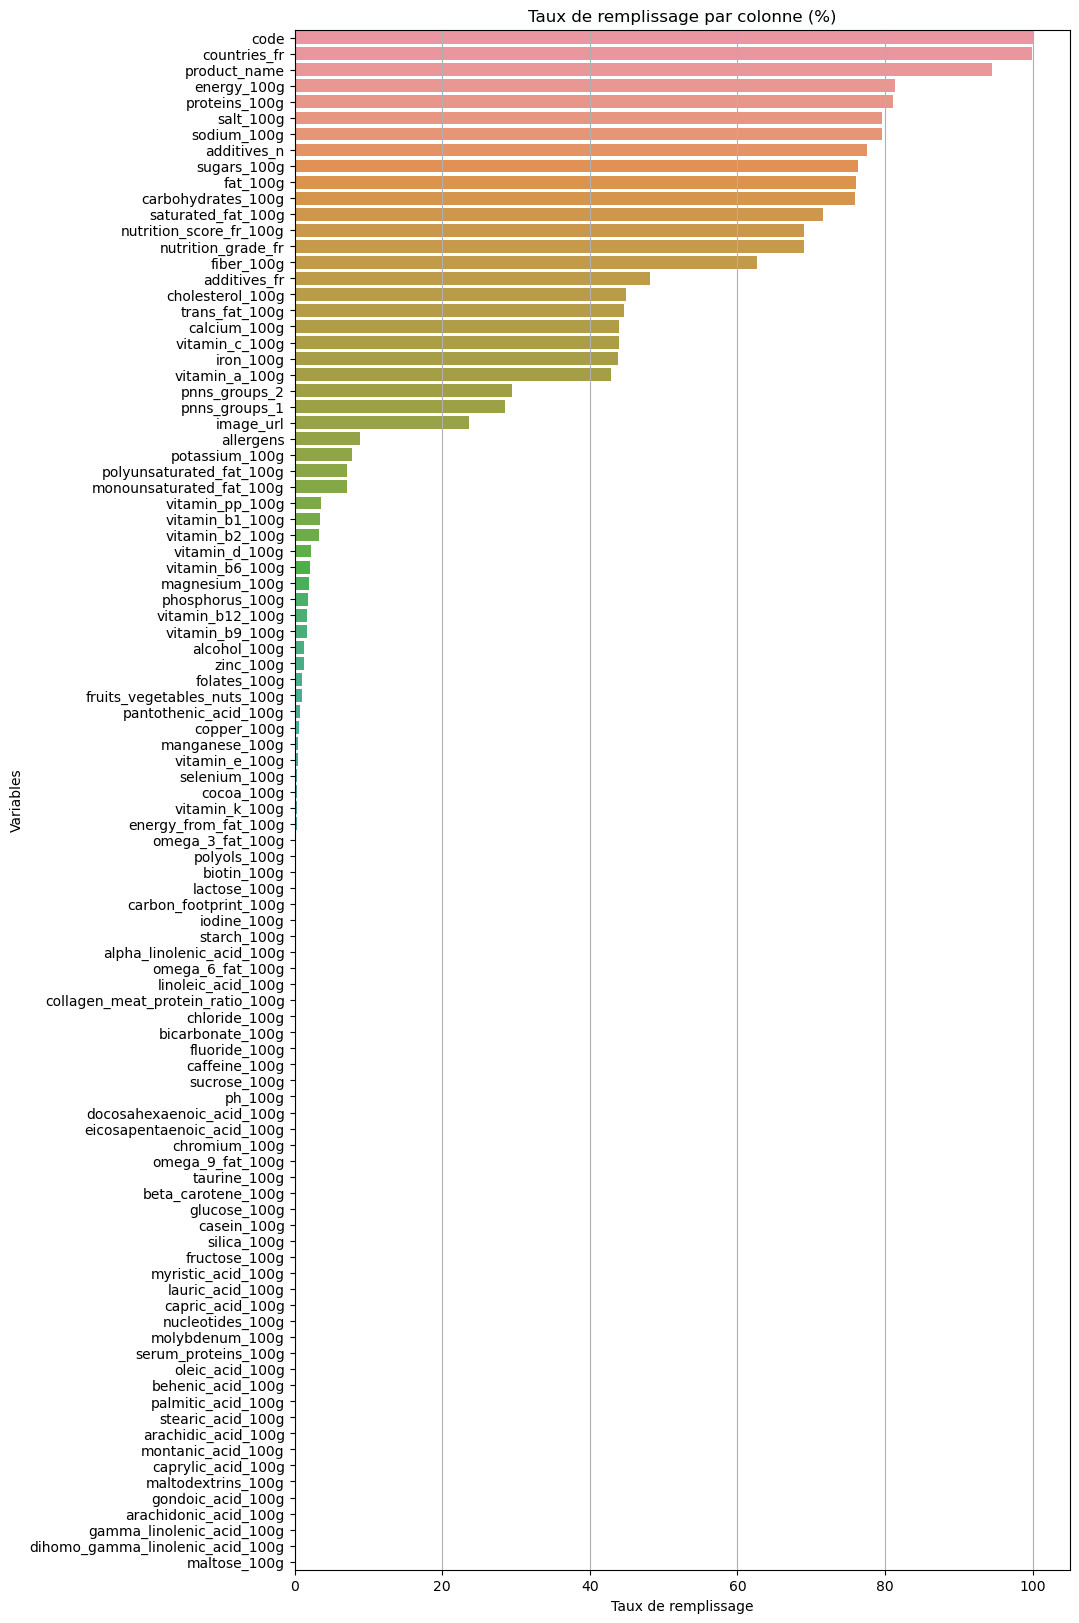

In [39]:
# Taux de remplissage des variables sélectionnées
df = pd.DataFrame(round(food_data.count(axis=0)/food_data.shape[0]*100,2),
             columns=['Taux de remplissage']).sort_values('Taux de remplissage',
                                                          ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(y=df['index'],
             x='Taux de remplissage',
             data=df,
           )
plt.grid(axis="x")
plt.title('Taux de remplissage par colonne (%)')
plt.ylabel("Variables")
plt.show()

**Suppression des colonnes dont le taux de remplissage est inférieure à 20%**

In [40]:
food_data = food_data.loc[:, (1 - food_data.isnull().mean())>=.20]
food_data.shape

(320749, 25)

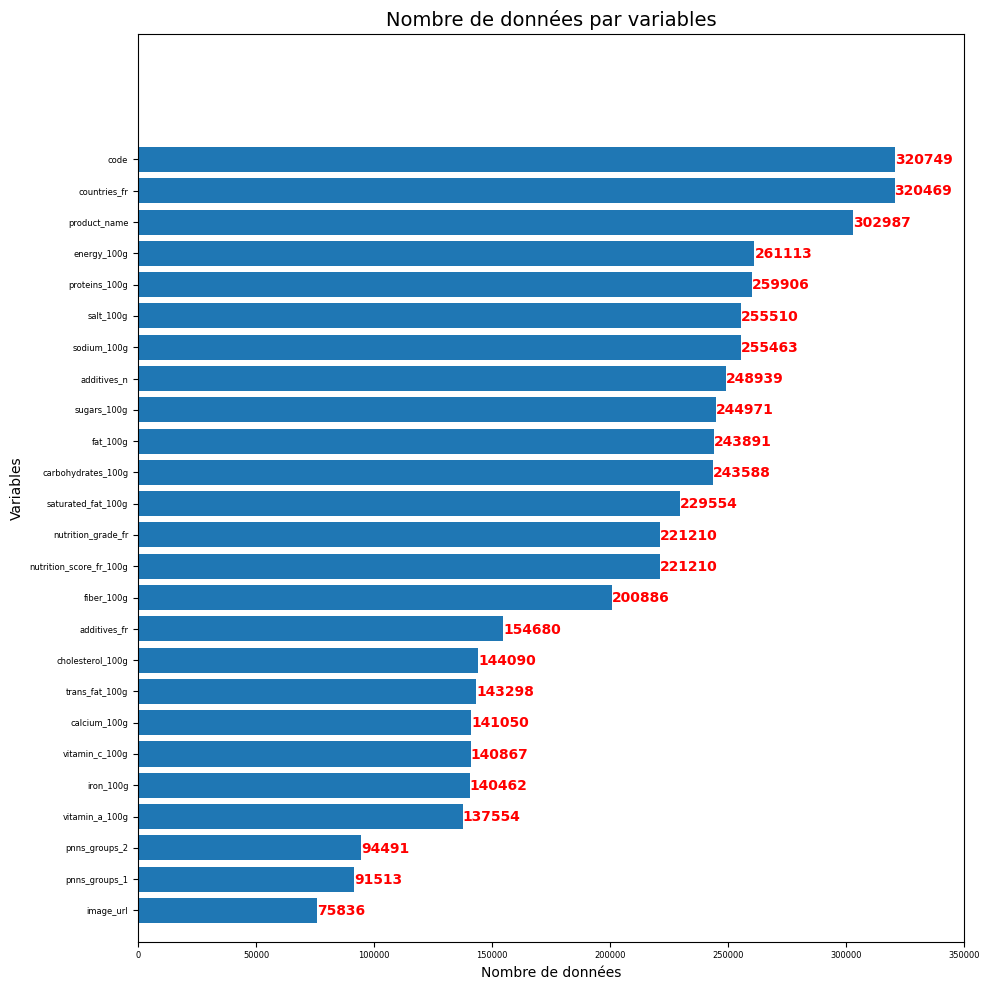

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

renseignée = food_data.count()
renseignée.sort_values(inplace=True)
ax.barh(y=renseignée.index, width=renseignée.values)
for i, v in enumerate(renseignée):
    ax.text(v + 1, i - .15, str(v), color="red",
            fontsize=10, fontweight="bold")
ax.set_title("Nombre de données par variables", fontsize=14)
ax.set_xlabel("Nombre de données", fontsize=10)
ax.set_ylabel("Variables", fontsize=10)
ax.tick_params(labelsize=6)
ax.set_xlim([0, 350000])
ax.set_ylim([-1, 28])
ax.grid(False)
fig.tight_layout()
plt.show()

### 2.3. Conservation des produits commercialisés en France

In [42]:
# Extraction des pays pour analyser les identifiants de la France et des territoires d'Outre-mer présents dans le jeu de données
food_data_fr = pd.DataFrame({'Liste pays': food_data.countries_fr.unique().tolist()})
food_data_fr.to_csv('Liste_pays.txt', header=True, index=None, sep=',', mode='w')

In [43]:
# Concervations des produits commercialisés en France et en territoire d'Outre mer
data = food_data[(food_data["countries_fr"].str.contains("France"))
                         |(food_data["countries_fr"].str.contains("Martinique"))
                         |(food_data["countries_fr"].str.contains("La Réunion"))
                         |(food_data["countries_fr"].str.contains("Guadeloupe"))
                         |(food_data["countries_fr"].str.contains("Guyane"))
                         |(food_data["countries_fr"].str.contains("Saint-Martin"))
                         |(food_data["countries_fr"].str.contains("Mayotte"))
                         |(food_data["countries_fr"].str.contains("polynésie française"))
                         |(food_data["countries_fr"].str.contains("Wallis-et-Futuna"))
                         |(food_data["countries_fr"].str.contains("Nouvelle-Calédonie"))
                         |(food_data["countries_fr"].str.contains("Saint-Pierre-et-Miquelon"))]
data.shape

(98972, 25)

### 3. Identification et corrections des valeurs abérrantes

In [44]:
# Calcul des statistiques élémentaires de chaque variable
data.describe(include="all")

code                product_name countries_fr   additives_n  \
count           98972                       91667        98972  53647.000000   
unique          98972                       74691          319           NaN   
top     0000000003087  Huile d'olive vierge extra       France           NaN   
freq                1                          62        94392           NaN   
mean              NaN                         NaN          NaN      1.856283   
std               NaN                         NaN          NaN      2.561090   
min               NaN                         NaN          NaN      0.000000   
25%               NaN                         NaN          NaN      0.000000   
50%               NaN                         NaN          NaN      1.000000   
75%               NaN                         NaN          NaN      3.000000   
max               NaN                         NaN          NaN     31.000000   

             additives_fr nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
count               30559              61502         65104         67268   
unique              11568                  5            13            41   
top     E322 - Lécithines                  d       unknown       unknown   
freq                 1717              17008         12550         12550   
mean                  NaN                NaN           NaN           NaN   
std                   NaN                NaN           NaN           NaN   
min                   NaN                NaN           NaN           NaN   
25%                   NaN                NaN           NaN           NaN   
50%                   NaN                NaN           NaN           NaN   
75%                   NaN                NaN           NaN           NaN   
max                   NaN                NaN           NaN           NaN   

                                                image_url   energy_100g  \
count                                               52851  6.471600e+04   
unique                                              52851           NaN   
top     http://fr.openfoodfacts.org/images/products/00...           NaN   
freq                                                    1           NaN   
mean                                                  NaN  1.170757e+03   
std                                                   NaN  1.282375e+04   
min                                                   NaN  0.000000e+00   
25%                                                   NaN  4.270000e+02   
50%                                                   NaN  1.034000e+03   
75%                                                   NaN  1.649000e+03   
max                                                   NaN  3.251373e+06   

            fat_100g  saturated_fat_100g  trans_fat_100g  cholesterol_100g  \
count   47768.000000        62468.000000      389.000000        418.000000   
unique           NaN                 NaN             NaN               NaN   
top              NaN                 NaN             NaN               NaN   
freq             NaN                 NaN             NaN               NaN   
mean       13.318622            5.420614        0.210799          0.040957   
std        16.924688            8.528118        0.981928          0.533881   
min         0.000000            0.000000        0.000000          0.000000   
25%         1.300000            0.300000        0.000000          0.000000   
50%         6.800000            2.000000        0.000000          0.000000   
75%        21.000000            7.400000        0.130000          0.006570   
max       380.000000          210.000000       17.200000         10.900000   

        carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g  \
count         47330.000000  62611.000000  45785.000000   64439.000000   
unique                 NaN           NaN           NaN            NaN   
top                    NaN           NaN           NaN            NaN   
freq         

Certains nutriments ont des valeurs négatives et d'autres ont des valeurs supérieurs à 100g (les quantités sont pourtant exprimées pour 100g d'aliments).

#### 3.1. Valeurs aberrantes des variables quantitaives

##### a) Variable énergie

[]

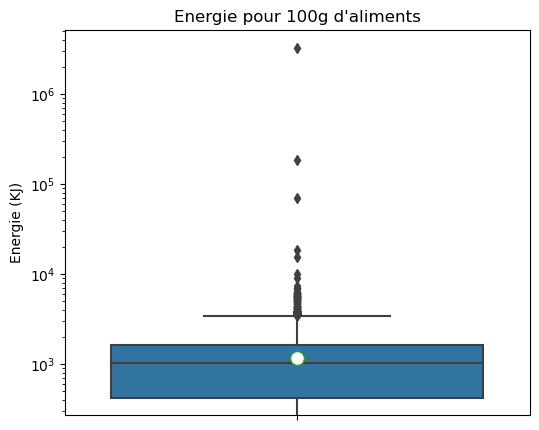

In [45]:
# Les valeurs énergétiques sont exprimées en kj. Par conséquent, la valeur énergétique maximale d'un aliment est 3.765,6 Kj
# visualisation des valeurs aberrantes avec la boîte à moustache
plt.figure(figsize=(6,5))
plt.title("Energie pour 100g d'aliments")
sns.boxplot(y="energy_100g", data=data, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markersize":"10"})
plt.ylabel("Energie (KJ)")
plt.semilogy()

Plusieurs valeurs sont au-dessus de la valeur maximale (3.765,6 Kj). Procédons au traitement de ces valeurs aberrantes.

In [46]:
# Combien y-a-t-il de valeurs aberrantes ? 
nombre = data["energy_100g"] > 3765
print("Il y a", nombre.sum(), "valeurs aberrantes pour la variable énergie")

Il y a 239 valeurs aberrantes pour la variable énergie


Deux options s'offrent :
- Soit on extrait les valeurs aberrantes pour les analyser à part ;
- Soit on les imputes.
Je choisis de les imputer car, 239 représente un faible pourcentage de nos données. Je vais procéder à l'imputation par les quartiles.

In [47]:
Q1=data["energy_100g"].quantile(0.25)
Q3=data["energy_100g"].quantile(0.75)
IQR=Q3-Q1
data = data.loc[lambda data: ~((data["energy_100g"] < (Q1 - 1.5 * IQR)) | (data["energy_100g"] > (Q3 + 1.5 * IQR)))]

Text(0, 0.5, 'Energie (KJ)')

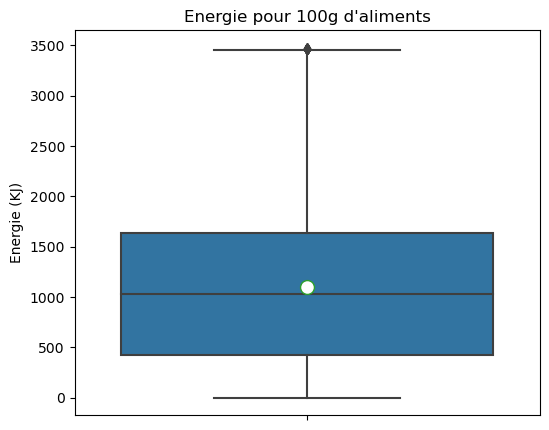

In [48]:
# Vérification de l'imputation
plt.figure(figsize=(6,5))
plt.title("Energie pour 100g d'aliments")
sns.boxplot(y="energy_100g", data=data, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markersize":"10"})
plt.ylabel("Energie (KJ)")

##### b) Les nutriments

In [49]:
# Sélection des colonnes nutriments
colonne_1 = data[data.columns[data.columns.str.endswith("_100g")
                                      & ~(data.columns.str.contains("nutrition"))]]
colonne = colonne_1.drop(colonne_1.columns[colonne_1.columns.str.contains("energy")], axis= 1)

In [50]:
colonne.describe().T

count       mean        std  min       25%        50%  \
fat_100g            47472.0  12.808490  15.544519  0.0  1.300000   6.700000   
saturated_fat_100g  61990.0   5.324250   8.220396  0.0  0.300000   1.900000   
trans_fat_100g        384.0   0.213544   0.988020  0.0  0.000000   0.000000   
cholesterol_100g      392.0   0.043119   0.551177  0.0  0.000000   0.000000   
carbohydrates_100g  47045.0  27.894082  27.391394  0.0  4.200000  14.800000   
sugars_100g         62155.0  13.494888  19.093053 -0.1  1.000000   4.100000   
fiber_100g          45439.0   2.569576   4.623449  0.0  0.000000   1.400000   
proteins_100g       63958.0   7.791815   7.884272  0.0  1.900000   6.000000   
salt_100g           62217.0   1.165060   4.318929  0.0  0.080000   0.565000   
sodium_100g         62214.0   0.458705   1.700348  0.0  0.031496   0.223811   
vitamin_a_100g        590.0   0.000626   0.005570  0.0  0.000057   0.000120   
vitamin_c_100g       1302.0   0.125185   2.794875  0.0  0.012000   0.020000   
calcium_100g         2262.0   0.324670   1.737801  0.0  0.120000   0.130000   
iron_100g            1187.0   0.044314   0.757338  0.0  0.002410   0.005000   

                          75%     max  
fat_100g            21.000000  105.00  
saturated_fat_100g   7.200000  100.00  
trans_fat_100g       0.150000   17.20  
cholesterol_100g     0.010000   10.90  
carbohydrates_100g  53.200000  164.00  
sugars_100g         18.000000  105.00  
fiber_100g           3.200000  178.00  
proteins_100g       11.000000  100.00  
salt_100g            1.250000  211.00  
sodium_100g          0.492126   83.00  
vitamin_a_100g       0.000463    0.12  
vitamin_c_100g       0.030000  100.00  
calcium_100g         0.329000   69.50  
iron_100g            0.008000   25.00

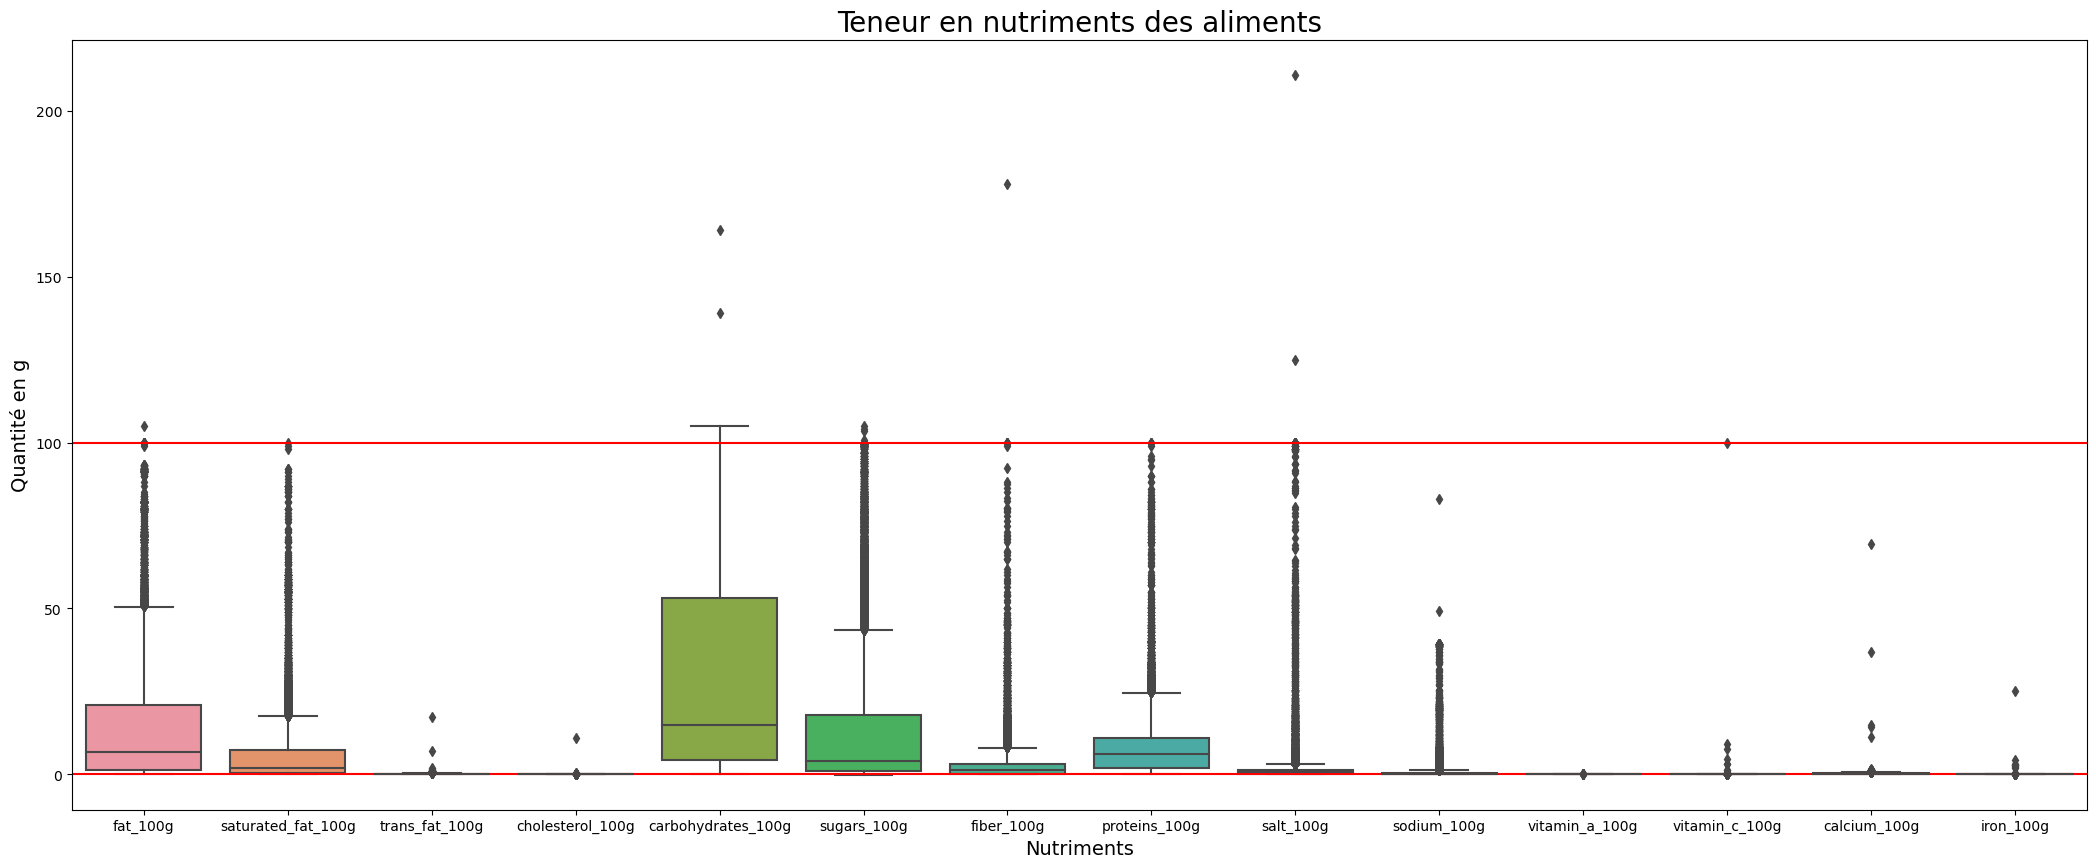

In [51]:
# Visualisation des valeurs aberrantes
plt.figure(figsize=(26,10))
plt.title("Teneur en nutriments des aliments", size=20)
sns.boxplot(data=colonne)
plt.ylabel("Quantité en g", size=14)
plt.xlabel("Nutriments", size=14)
plt.axhline(y=100, color='r')
plt.axhline(y=0, color='r')

Exepté la vitamine A, toutes les variables présentent des valeurs aberrantes (supérieur à 100g).<br>
La méthode interquartile ne sera pas utilisée pour le traitement des valeurs aberrantes des nutriments car, certains produits alimentaires comme le sel est composé de 100% de sel, donc environ 100g pour la variable "salt_100g". Mais le sel sera considéré comme un outlier dans notre figure.<br> Par conséquent, les valeurs aberrantes pour les nutriments seront supprimées.

Pour notre analyse, on utilisera les valeurs non aberrantes comprises entre 0g et 100g pour les variables nutriments.

In [52]:
valeur_aberrante = data[(colonne.salt_100g >100)
                              | (colonne.sodium_100g >100)
                             |(colonne.proteins_100g > 100)
                             |(colonne.sugars_100g > 100)
                             |(colonne.saturated_fat_100g > 100)
                            |(colonne.fat_100g > 100)
                              |(colonne.fiber_100g > 100)
                              |(colonne.carbohydrates_100g > 100)
                             ]

In [53]:
def shape_data(df):
    lignes = df.shape[0]
    colonnes = df.shape[1]
    print(f"Le dataset a {lignes} lignes et {colonnes} colonnes.")

In [54]:
shape_data(valeur_aberrante)
valeur_aberrante.head()

Le dataset a 10 lignes et 25 colonnes.


code                 product_name countries_fr  additives_n  \
155609  0838619000254              Beurre d'érable       France          NaN   
202571  3229820787909       Sirop d'Agave brun bio       France          0.0   
232239  3423720002432                    Keeny Bio       France          4.0   
233372  3445850070259  Sel de Guérande Label Rouge       France          0.0   
239347  3560070740338                Sirop d'agave       France          0.0   

                                             additives_fr nutrition_grade_fr  \
155609                                                NaN                NaN   
202571                                                NaN                  d   
232239  E422 - Glycérol,E322 - Lécithines,E500 - Carbo...                  e   
233372                                                NaN                  c   
239347                                                NaN                NaN   

        pnns_groups_1       pnns_groups_2  \
155609        unknown             unknown   
202571        unknown             unknown   
232239  Sugary snacks  Biscuits and cakes   
233372        unknown             unknown   
239347  Sugary snacks              Sweets   

                                                image_url  energy_100g  \
155609                                                NaN       1390.0   
202571  http://fr.openfoodfacts.org/images/products/32...       1760.0   
232239                                                NaN       1720.0   
233372  http://fr.openfoodfacts.org/images/products/34...          0.0   
239347  http://fr.openfoodfacts.org/images/products/35...       1785.0   

        fat_100g  saturated_fat_100g  trans_fat_100g  cholesterol_100g  \
155609       0.0                0.00             NaN               NaN   
202571       0.0                0.00             NaN               NaN   
232239      23.0                3.33             NaN               NaN   
233372       0.0                0.00             NaN               NaN   
239347       NaN                 NaN             NaN               NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
155609               164.0         72.7         NaN            0.0        NaN   
202571               104.0        104.0       0.000            0.0       0.14   
232239                47.8         26.7       0.741            6.3     211.00   
233372                 0.0          0.0       0.000            0.0     125.00   
239347               105.0        105.0         NaN            NaN        NaN   

        sodium_100g  vitamin_a_100g  vitamin_c_100g  calcium_100g  iron_100g  \
155609          NaN             NaN             NaN        0.0606        NaN   
202571     0.055100             NaN             NaN           NaN        NaN   
232239    83.000000             NaN             NaN           NaN        NaN   
233372    49.212598             NaN             NaN        0.1520      0.014   
239347          NaN             NaN             NaN           NaN        NaN   

        nutrition_score_fr_100g  
155609                      NaN  
202571                     15.0  
232239                     22.0  
233372                     10.0  
239347                      NaN

In [55]:
data.drop(axis = 1, index= valeur_aberrante.index, inplace=True)

In [56]:
shape_data(data)

Le dataset a 98468 lignes et 25 colonnes.


In [57]:
colonne.drop(axis = 0, index= valeur_aberrante.index, inplace=True)

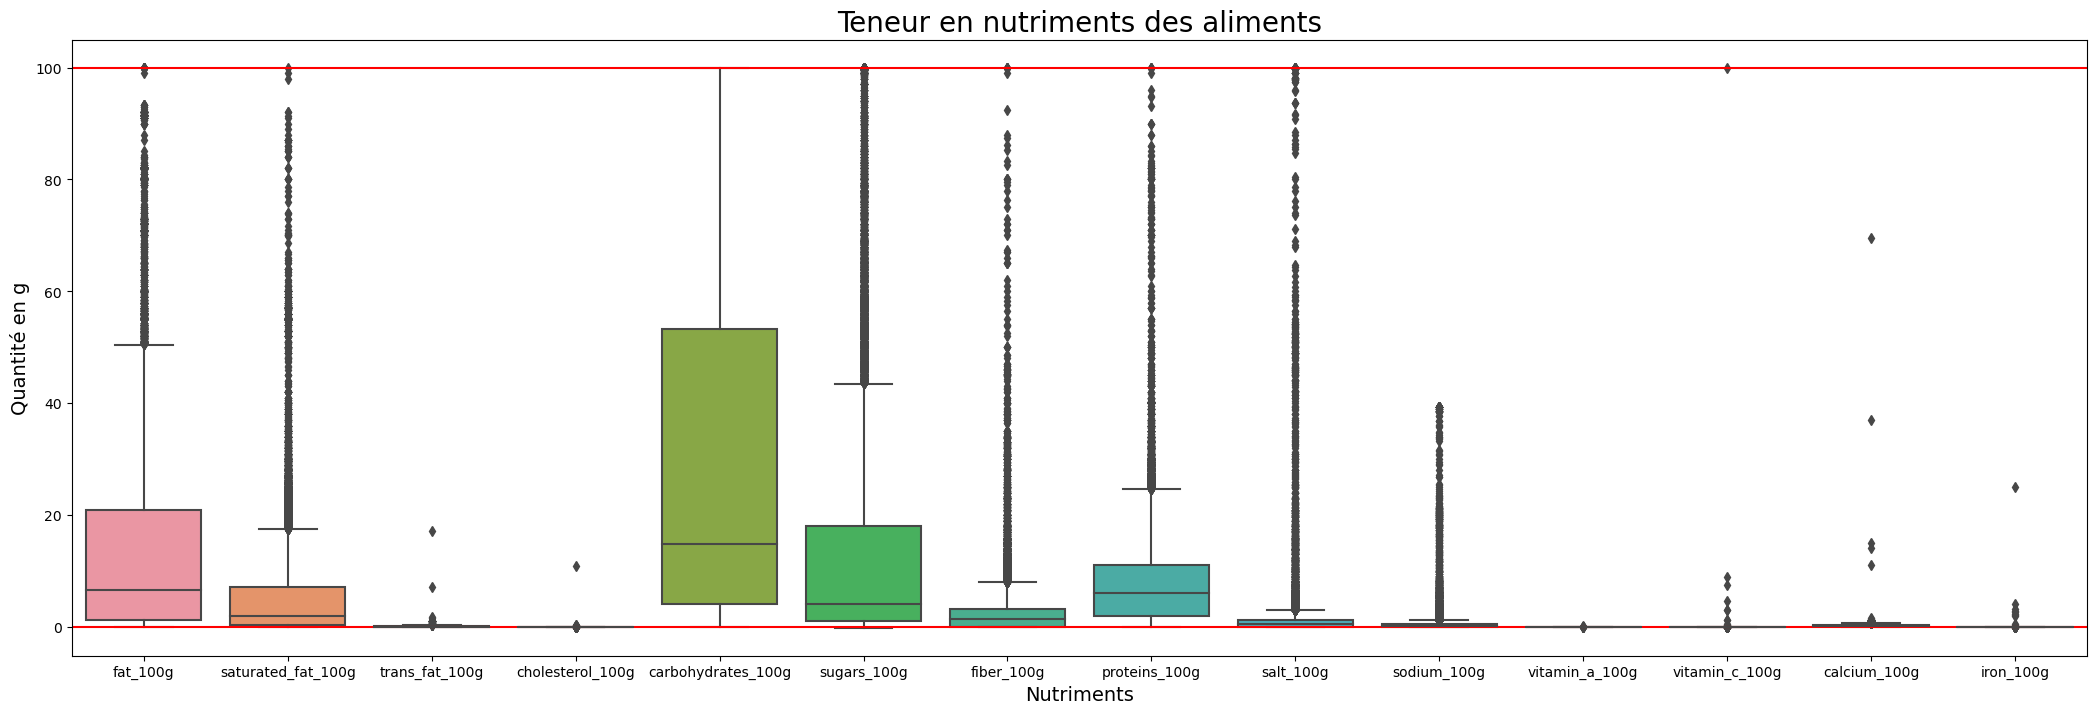

In [58]:
# Vérification de l'imputation
plt.figure(figsize=(26,8))
plt.title("Teneur en nutriments des aliments", size=20)
sns.boxplot(data=colonne)
plt.ylabel("Quantité en g", size=14)
plt.xlabel("Nutriments", size=14)
plt.axhline(y=100, color='r')
plt.axhline(y=0, color='r')

##### c) Le sel et le sodium

Le sel, représenté par la variable "salt_100g", est composé de chlore et de sodium (sodium représenté par "sodium_100g). La relation entre le sodium et le sel est définit mathématiquement par l'équation 1g de sel = 600mg de Cl + 400mg de Na. Soit : quantité de Na = 1g de sel/2,5  <br>
Je souhaite vérifier que cette équation est respectée dans les variables de notre jeu de données.

In [59]:
# Recherche des aliments avec quantité de sodium non proportionnel à la quantité de sel 
print("Il y a", data[data['sodium_100g'] > data['salt_100g'] /
         2.5][['sodium_100g']].count().sum(), "produit alimentaire dont la quantité de sodium est non proportionnelle à la quantité de sel.")

Il y a 0 produit alimentaire dont la quantité de sodium est non proportionnelle à la quantité de sel.


##### d) Glucide (carbohydrates) et sucre (sugars)
Le sucre fait partie des glucides. La teneur en sucre d'un aliment ne peut donc pas dépasser la teneur glucide de ce même aliment. Exepté pour les aliments constitués uniquement de sucre comme : les bonbons, le sucre...

In [60]:
# Recherche des aliments dont la quantité de sucre est supérieure à la quantité de glucide
outliers_sucre = data[data['carbohydrates_100g']  < data['sugars_100g']][[
    'product_name', 'carbohydrates_100g', 'sugars_100g']]
print("Nombre de produits dont la quantité de glucides est inférieure à la quantité de sucres : ", len(outliers_sucre))

Nombre de produits dont la quantité de glucides est inférieure à la quantité de sucres :  99


In [61]:
# Suppression de ces valeurs aberrantes
data = data.drop(outliers_sucre.index)

##### e) Les lipides
Comme avec les glucides, la teneur en lipides d'un aliment ne peut inférieure la teneur en acide gras (saturés, trans et cholestérol).

In [62]:
outliers_gras = data[data['fat_100g']  < data['saturated_fat_100g']][[
    'product_name', 'fat_100g', 'saturated_fat_100g']]
print("Nombre de produits dont la quantité de lipides est inférieure à la quantité d'acides gras : ", len(outliers_gras))

Nombre de produits dont la quantité de lipides est inférieure à la quantité d'acides gras :  80


In [63]:
# Suppression de ces valeurs aberrantes
data = data.drop(outliers_gras.index)

In [64]:
data.shape

(98289, 25)

##### f)  Additives_n

Text(0, 0.5, "Quantité d'additifs")

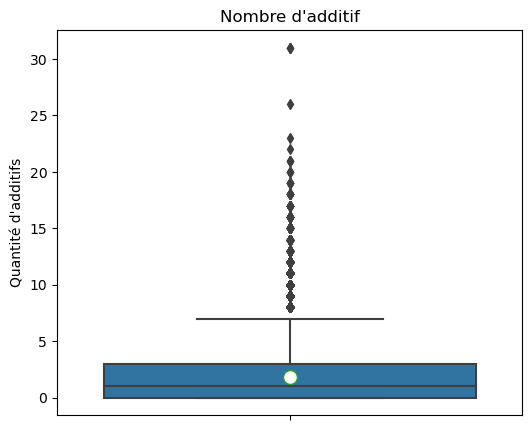

In [65]:
# visualisation des valeurs aberrantes pour le nombre d'additif
plt.figure(figsize=(6,5))
plt.title("Nombre d'additif")
sns.boxplot(y="additives_n", data=data, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markersize":"10"})
plt.ylabel("Quantité d'additifs")

Les quantités d'additives vont jusqu'à 30 pour certains produits, ce qui semble improbable.<br>
Vérifions la liste des ingédients pour ce produit.

In [66]:
# Liste des ingredients pour le produit avec le maximum d'additifs 
data.loc[data.additives_n.idxmax()]

code                                                           2600280009649
product_name                                                      Confiserie
countries_fr                                                          France
additives_n                                                             31.0
additives_fr               E428 - Gélatine,E14XX - Amidons modifiés,E160c...
nutrition_grade_fr                                                         d
pnns_groups_1                                                  Sugary snacks
pnns_groups_2                                                         Sweets
image_url                  http://fr.openfoodfacts.org/images/products/26...
energy_100g                                                           1702.0
fat_100g                                                                 6.9
saturated_fat_100g                                                       4.0
trans_fat_100g                                                           NaN

Après vérification du produit sur le site internet de Open Food Facts, grâce au code du produit, la conclusion est qu'il ne s'agit d'une valeur aberrante.<br>On en déduit par conséquent qu'il n'y a pas de valeur aberrante pour le nombre d'additif.

##### h) Nutriscore
Dans sa définition, le nutrisscore à des valeurs comprises entre -15 et 40

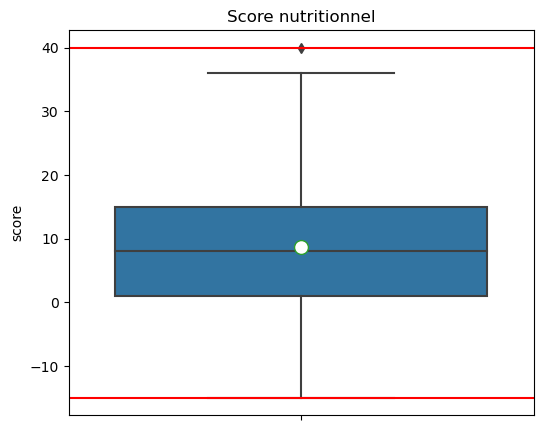

In [67]:
plt.figure(figsize=(6,5))
plt.title("Score nutritionnel")
sns.boxplot(y="nutrition_score_fr_100g", data=data, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markersize":"10"})
plt.ylabel("score")
plt.axhline(y=40, color='r')
plt.axhline(y=-15, color='r')

Pas de valeur aberrante : le nutriscore est bien compris entre -15 et 40.

#### 3.1. Valeurs aberrantes des variables qualitatives

##### a) Variable code

Les doublons de cette variable ont été corrigés précedemment.<br>
Aucune valeur n'est manquante et impossible d'identifié les valeurs aberrantes car, les code-barres des produits sont:
- Soit de type EAN-13 ;
- Soit des codes internes aux magasins d'alimentation ;
- Et pour les produits sans code-barres, Open Food Facts attribue un numéro commençant par le préfixe réservé 200.

##### b) Variable image url

In [68]:
# Recherche de doublons
doublons_image = data[data.duplicated(['image_url'], keep=False)]
nb_doublons_image = doublons_image[doublons_image['image_url'].notnull(
)].shape[0]
print("Nombre de doublons sur la photographie du produit :", nb_doublons_image)

Nombre de doublons sur la photographie du produit : 0


Pas de doublon.

##### c) Variable product name

In [69]:
# Aucun produit alimentaire n'a un nom inférieur à 3 lettres 
# Nombre de produit avec un nom de moins de 3 caractères
print(len(data[data['product_name'].str.len() < 3]))

21


In [70]:
# Suppression des produits avec un nom à moins de 3 caractères
data = data.drop(data[data['product_name'].str.len() < 3].index)

##### d) Variable countries_fr
Le jeu de données a été restreint aux produits vendus en France et en Outre mer. Par conséquent, on peut supprimer cette variable.

In [71]:
# Suppression de la variable countries_fr
data.drop(["countries_fr"], axis=1)
data.shape

(98268, 25)

##### e) Variable nutrition grade

In [72]:
# visualisation des valeurs de cette variable
data["nutrition_grade_fr"].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

In [73]:
data["nutrition_grade_fr"].isnull().sum()

37392

In [74]:
gb = data.groupby('nutrition_grade_fr')['nutrition_score_fr_100g']
df_nutriscore = pd.DataFrame([gb.get_group(n).values for n in list('abcde')],
                             index=list('abcde')).T

In [75]:
df_nutriscore.describe()

a            b             c             d             e
count  10211.000000  9184.000000  13109.000000  16722.000000  11650.000000
mean      -3.637156     0.893402      5.662598     13.816828     21.380258
std        2.310320     0.945806      2.459757      2.549761      4.029779
min      -15.000000    -8.000000      2.000000      6.000000     10.000000
25%       -5.000000     0.000000      4.000000     12.000000     19.000000
50%       -3.000000     1.000000      5.000000     14.000000     21.000000
75%       -2.000000     2.000000      8.000000     16.000000     24.000000
max       10.000000     2.000000     10.000000     18.000000     40.000000

On peut observer que certains produits ont une note de A pourtant leur score nutritionnel est de 10.<br> Vérifions cette observation

In [76]:
# Affichage des produits avec une note de A et leur score nutritionnel correspondant par produit
cond1 = data['nutrition_grade_fr'] == 'a'
cond2 = data['nutrition_score_fr_100g'] > 0
data[cond1 & cond2][['product_name', 'code', 'nutrition_score_fr_100g',
                         'nutrition_grade_fr']]

product_name           code  \
180946           Pétillante saveur Citron       20656935   
192052                Sans sucres Agrumes  3068320019628   
192056                              Evian  3068320055008   
192065            La Salvetat Citron vert  3068320102993   
192067                      Badoit Citron  3068320105192   
192073                   Badoit Framboise  3068320107844   
192119                 La Salvetat Citron  3068320693002   
198272        Perrier citron vert, limoen  3179732368942   
220374  Sémillante arômes naturels Citron  3271330062939   
245670                     Source St Jean  3596710336432   
304683                         Courmayeur  8024884501400   

        nutrition_score_fr_100g nutrition_grade_fr  
180946                      1.0                  a  
192052                      1.0                  a  
192056                     10.0                  a  
192065                      1.0                  a  
192067                      1.0                  a  
192073                      1.0                  a  
192119                      1.0                  a  
198272                      1.0                  a  
220374                      4.0                  a  
245670                      2.0                  a  
304683                      6.0                  a

##### f) Variable pnns_groups_1

In [77]:
data.groupby("pnns_groups_1")[["product_name"]].count()

product_name
pnns_groups_1                        
Beverages                        6575
Cereals and potatoes             6110
Composite foods                  6023
Fat and sauces                   3471
Fish Meat Eggs                   6737
Fruits and vegetables            4060
Milk and dairy products          6407
Salty snacks                     2113
Sugary snacks                    9341
cereals-and-potatoes                2
fruits-and-vegetables             544
sugary-snacks                     470
unknown                         11429

In [78]:
# harmonisation des orthographes
data['pnns_groups_1'] = data['pnns_groups_1'].replace(['fruits-and-vegetables','cereals-and-potatoes', 'sugary-snacks','unknown'],
                                                      ['Fruits and vegetables','Cereals and potatoes', 'Sugary snacks', np.nan])

In [79]:
data['pnns_groups_1'].isnull().sum()

46166

In [80]:
data.groupby("pnns_groups_1")[["product_name"]].count()

product_name
pnns_groups_1                        
Beverages                        6575
Cereals and potatoes             6112
Composite foods                  6023
Fat and sauces                   3471
Fish Meat Eggs                   6737
Fruits and vegetables            4604
Milk and dairy products          6407
Salty snacks                     2113
Sugary snacks                    9811

Les catégories de produits sont correctement renseignées. Plusieurs valeurs manquantes avec la nomination "unknown" que nous avons transformés en NaN

##### f) Variable pnns_groups_2

In [81]:
data.groupby("pnns_groups_2")[["product_name"]].count().sort_values(by="product_name")

product_name
pnns_groups_2                                 
legumes                                      1
cereals                                      1
Salty and fatty products                    15
fruits                                      24
Tripe dishes                                64
Potatoes                                   103
Artificially sweetened beverages           209
Fruit nectars                              309
Eggs                                       321
Dried fruits                               374
Soups                                      425
Pizza pies and quiche                      455
pastries                                   470
Nuts                                       477
vegetables                                 520
Legumes                                    546
Ice cream                                  588
Sandwich                                   639
Dairy desserts                             742
Fats                                       891
Breakfast cereals                         1111
Bread                                     1317
Meat                                      1346
Fruits                                    1501
Fruit juices                              1526
Appetizers                                1621
Sweetened beverages                       1669
Vegetables                                1760
Alcoholic beverages                       2016
Milk and yogurt                           2068
Fish and seafood                          2179
Chocolate products                        2198
Dressings and sauces                      2580
Non-sugared beverages                     2862
Processed meat                            2891
Cheese                                    3009
Cereals                                   3033
Sweets                                    3392
Biscuits and cakes                        3751
One-dish meals                            4929
unknown                                  11429

Les sous catégories de produits sont correctement renseignées. Plusieurs valeurs manquantes avec la nomination "unknown"

In [82]:
data['pnns_groups_2'] = data['pnns_groups_2'].replace(['unknown'],
                                                      [np.nan])

In [83]:
data['pnns_groups_2'].isnull().sum()

44007

##### g) Variable additifs_fr

In [84]:
pd.set_option("display.max_colwidth", None)
data[data["additives_fr"].notnull()]["additives_fr"].head(50)

106                                                                                                                                                                                                                                                                                                                 E322 - Lécithines
184                                                                                                                                                                                                                                                                  E1400 - Dextrines,E322 - Lécithines,E503 - Carbonates d'ammonium
189                                                                                                                                                                                                                                      E330 - Acide citrique,E171 - Oxyde de titane,E211 - Benzoate de sodium,E131 - Bleu patenté V
226                   

Aucune valeur aberrante.

### 4. Traitement des valeurs manquantes

In [85]:
shape_data(data)

Le dataset a 98268 lignes et 25 colonnes.


In [86]:
# calcul du nombre de valeurs manquantes
nb_NaN = data.isnull().sum().sum()
# calcul du nombre de données total
nb_donnée = np.product(data.shape)
# calcul du pourcentage des données manquantes
pourcentage_NaN = round((nb_NaN/nb_donnée)*100, 2)
print("Il y a", nb_NaN, "valeurs manquantes pour", nb_donnée, "données, soit", pourcentage_NaN, "% de données manquantes")

Il y a 1283816 valeurs manquantes pour 2456700 données, soit 52.26 % de données manquantes


In [87]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = data.isnull().sum()
pourcentage = 100*(valeur_manquante)/len(data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

**Suppression des variables avec plus de 80% de valeurs manquantes**


In [88]:
data = data.loc[:, (1 - data.isnull().mean())>=.20]
data.shape

(98268, 19)

In [89]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = data.isnull().sum()
pourcentage = 100*(valeur_manquante)/len(data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

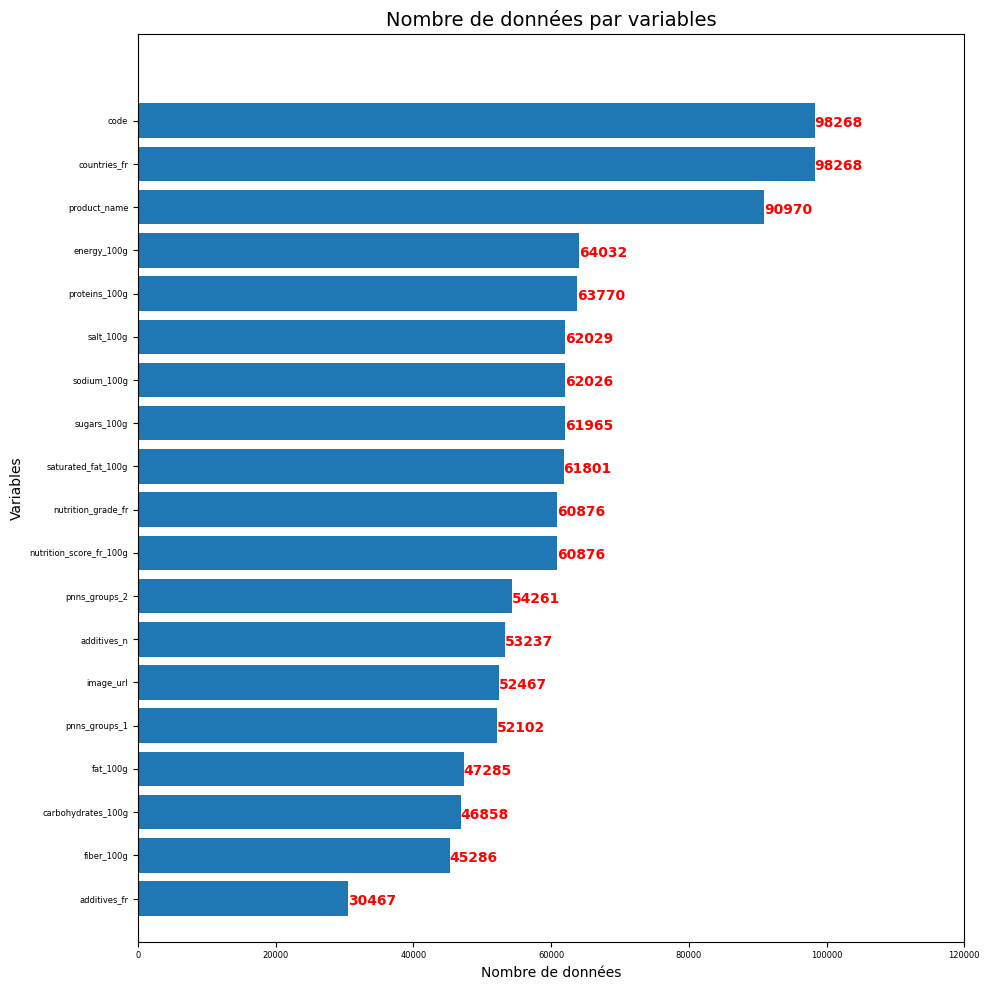

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

renseignée = data.count()
renseignée.sort_values(inplace=True)
ax.barh(y=renseignée.index, width=renseignée.values)
for i, v in enumerate(renseignée):
    ax.text(v + 1, i - .15, str(v), color="red",
            fontsize=10, fontweight="bold")
ax.set_title("Nombre de données par variables", fontsize=14)
ax.set_xlabel("Nombre de données", fontsize=10)
ax.set_ylabel("Variables", fontsize=10)
ax.tick_params(labelsize=6)
ax.set_xlim([0, 120000])
ax.set_ylim([-1, 20])
ax.grid(False)
fig.tight_layout()
plt.show()

**Corrélation entre les nutriments**

<AxesSubplot:>

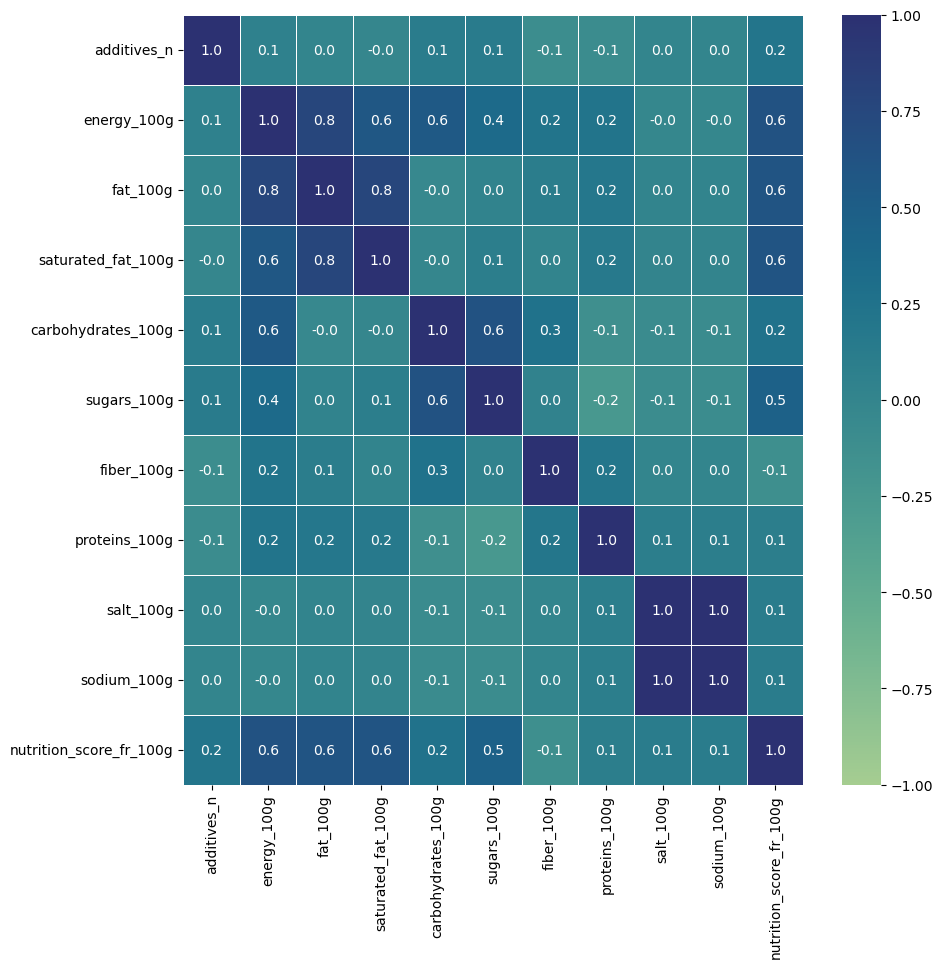

In [91]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, cmap="crest", vmin=-1, vmax=1, annot=True, linewidth=.5, fmt=".1f")

**Les additifs**

Il impossible de trouver la liste des additifs utilisés dans un produit si celle-ci n'est pas renseigner par le fabricant. Pas conséquent, aucune imputation ne sera effectuée pour les additifs manquants.

**Nombre d'additifs**

Si le nombre d'additifs n'est pas renseigné, on peut considérer soit qu'il n'est pas connu, soit qu'il n'y a pas d'additif dans le produit. Le choix est fait de remplacer les valeurs manquantes par "0".

In [92]:
data["additives_n"].fillna(0, inplace=True)

C:\Users\alain\AppData\Local\Temp\ipykernel_16180\1636814291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["additives_n"].fillna(0, inplace=True)


**Image**

Pas d'imputation pour les images manquantes car, on ne peut attribuer l'image d'un produit à un autre.

In [93]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = data.isnull().sum()
pourcentage = 100*(valeur_manquante)/len(data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

Pour les autres variables quantitatives, je souhaite vérifier qu'elles suivent la distribution de la loi normale ou pas. Cette vérification permettra de définir la méthode d'imputation.
- Si une distribution suit la loi normale, on choisira l'imputation par la moyenne ;
- Dans le cas contraire, on utilisera une autre approche telque le KNN imputer.

In [94]:
data.dtypes

code                        object
product_name                object
countries_fr                object
additives_n                float64
additives_fr                object
nutrition_grade_fr          object
pnns_groups_1               object
pnns_groups_2               object
image_url                   object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition_score_fr_100g    float64
dtype: object

In [95]:
variable_quantitative = list(data.select_dtypes(include=["float64","int64"]).columns)
#On supprime les nutriscores qui eux peuvent être négatifs
variable_quantitative.remove('nutrition_score_fr_100g')

C:\Users\alain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


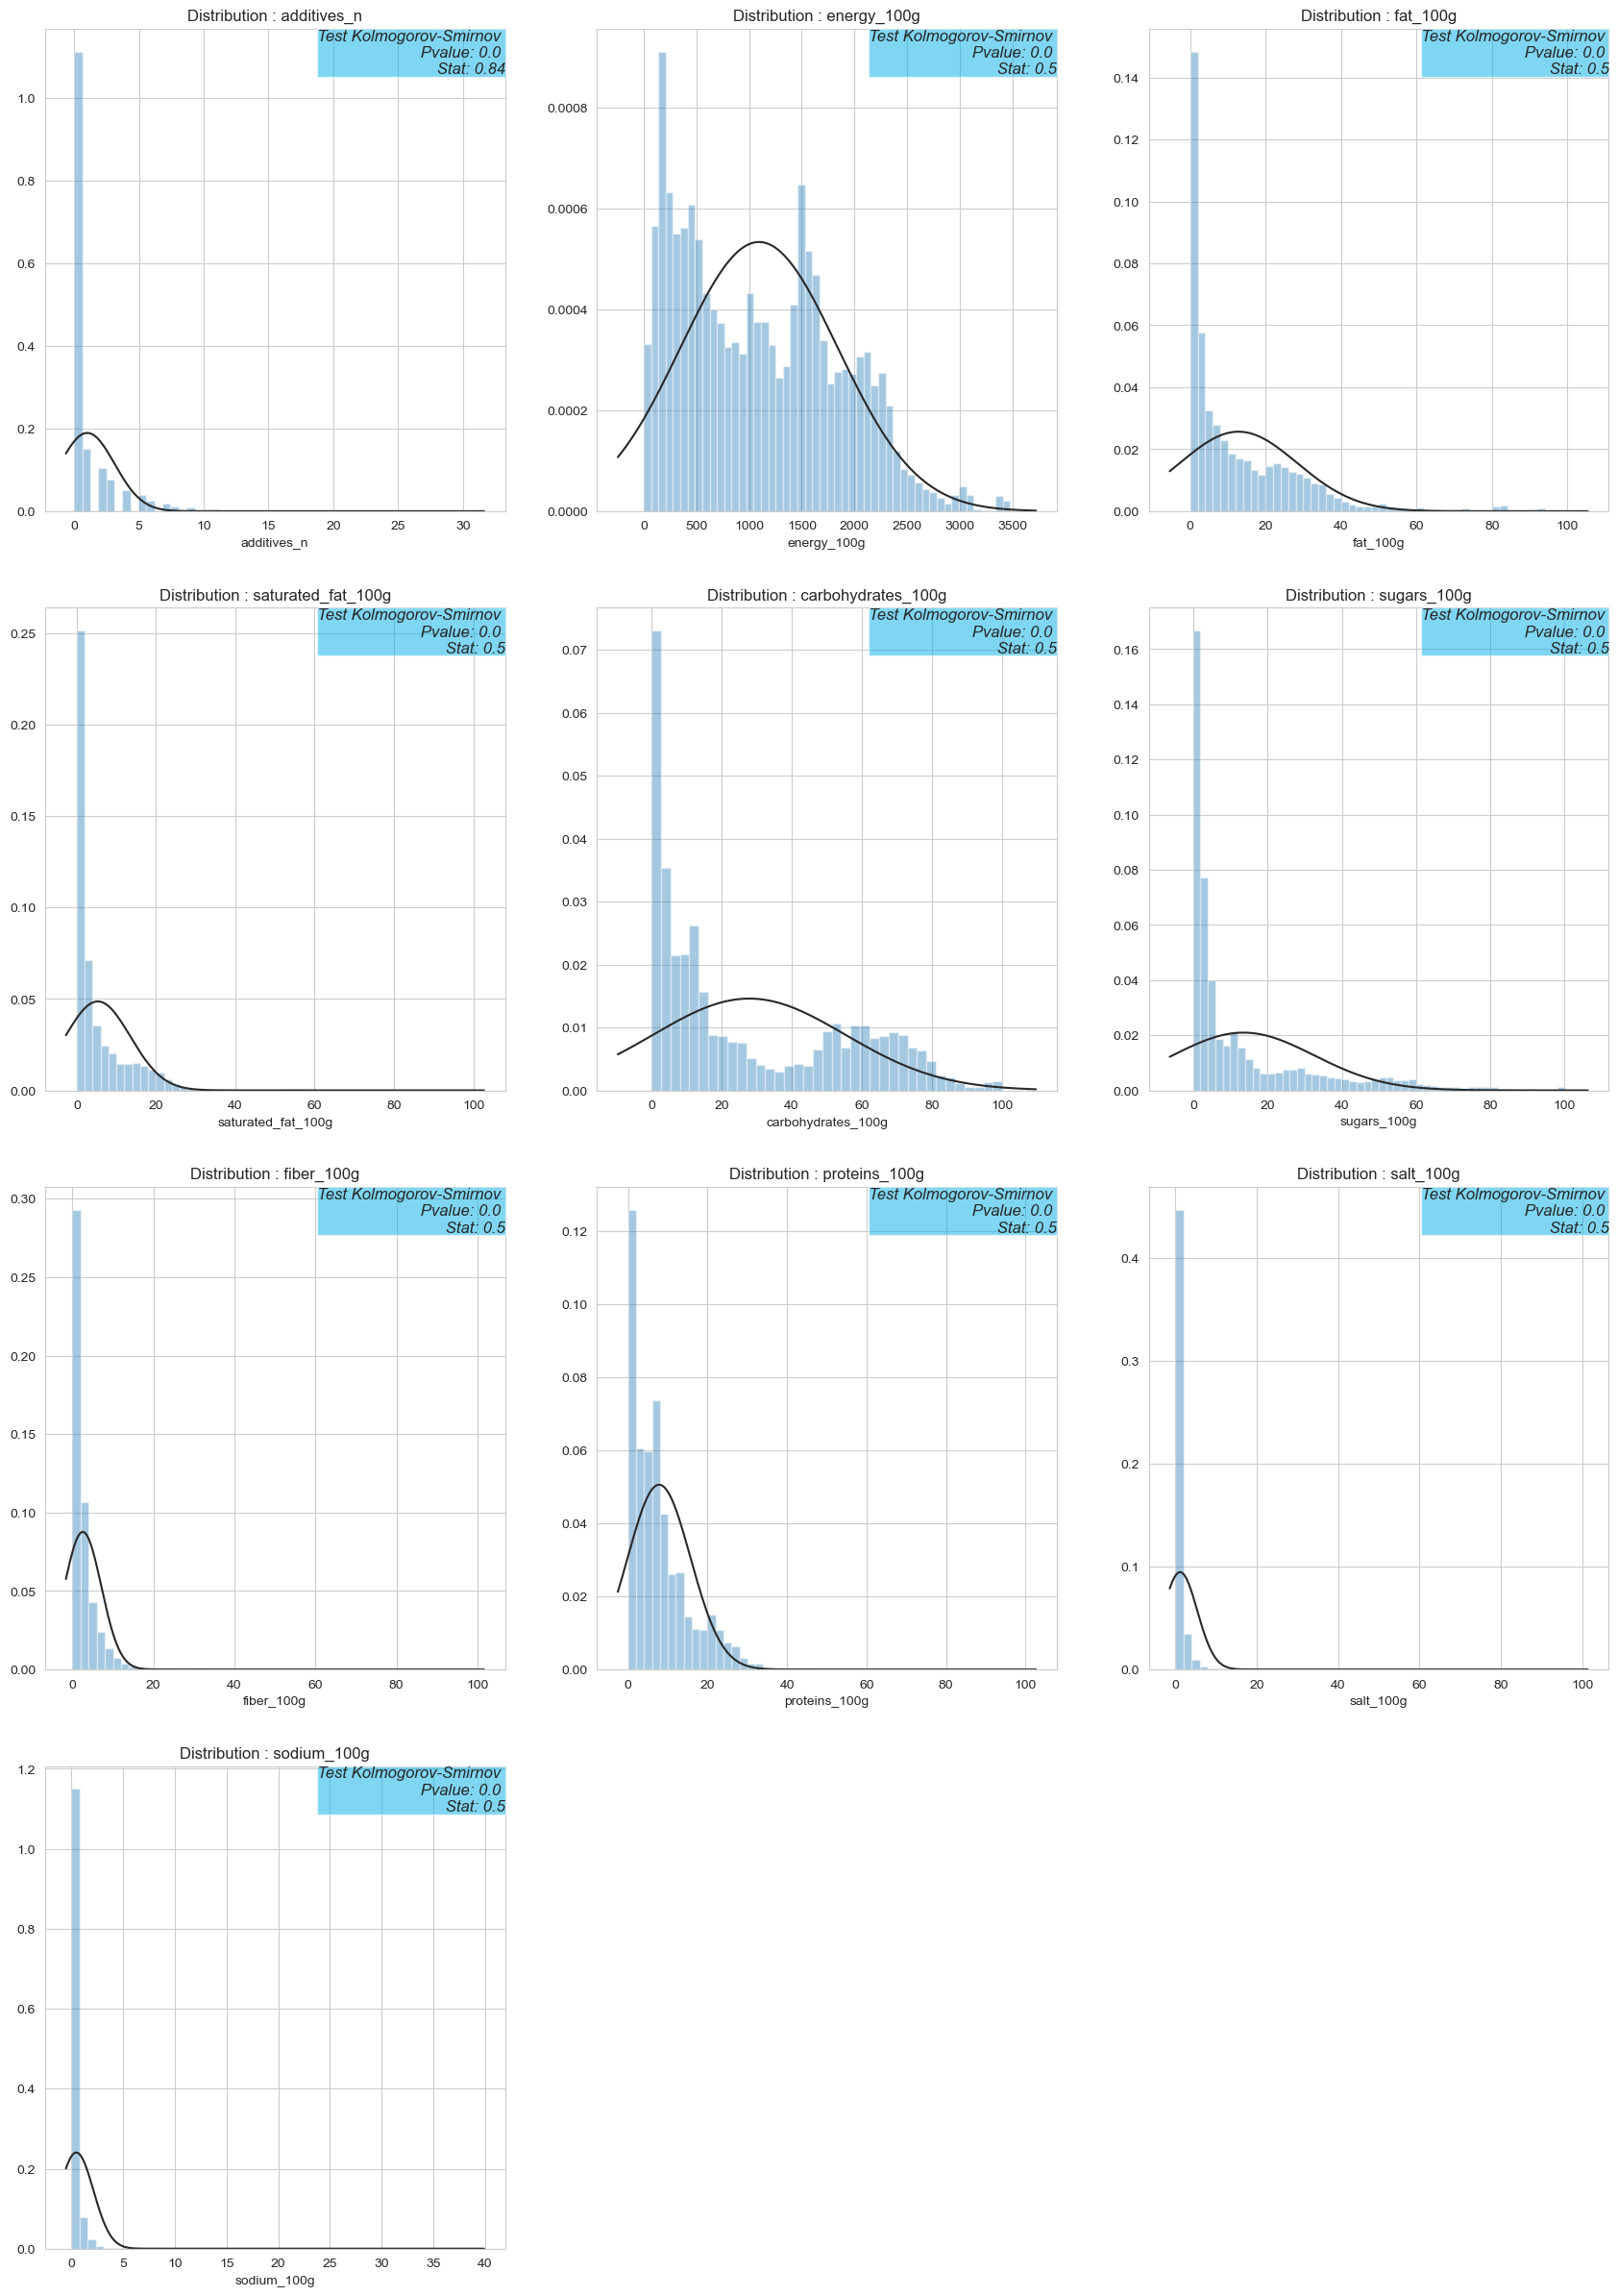

In [96]:
import scipy.stats as stats

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(variable_quantitative)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = variable_quantitative[i]
    kstest = stats.kstest(data[colonne].notnull(),'norm')
    ax = sns.distplot(data[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

Aucune des distribution ne suit une loi normale. Il serait inexacte d'imputer les valeurs manquantes par la moyenne. On va donc les imputer en utilisant l'algorithme des K Nearest Neighbours (KNN)

**_Mise en place de l'algorithme_**

In [97]:
# Ecartons la variable "additives_n" car on a déja procédé à l'imputation des nan
variable_quantitative.remove("additives_n")

In [98]:
# Entraînement du modèle d'imputation sur un échantillon de données
knn_features = ['energy_100g','proteins_100g','saturated_fat_100g','sugars_100g','salt_100g',
                'carbohydrates_100g','sodium_100g','fat_100g','fiber_100g']
sample_datas = data[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [99]:
# Application du modèle sur l'ensemble des données
datas_imputed = imputer.transform(data[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [100]:
for col_knn in knn_features:
    data[col_knn] = df_datas_imputed[col_knn].values

C:\Users\alain\AppData\Local\Temp\ipykernel_16180\2076616396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_knn] = df_datas_imputed[col_knn].values


In [101]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = data.isnull().sum()
pourcentage = 100*(valeur_manquante)/len(data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

Observons à nouveau les distributions des variables, afin de s'assurer qu'elles n'ont pas changées.

C:\Users\alain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


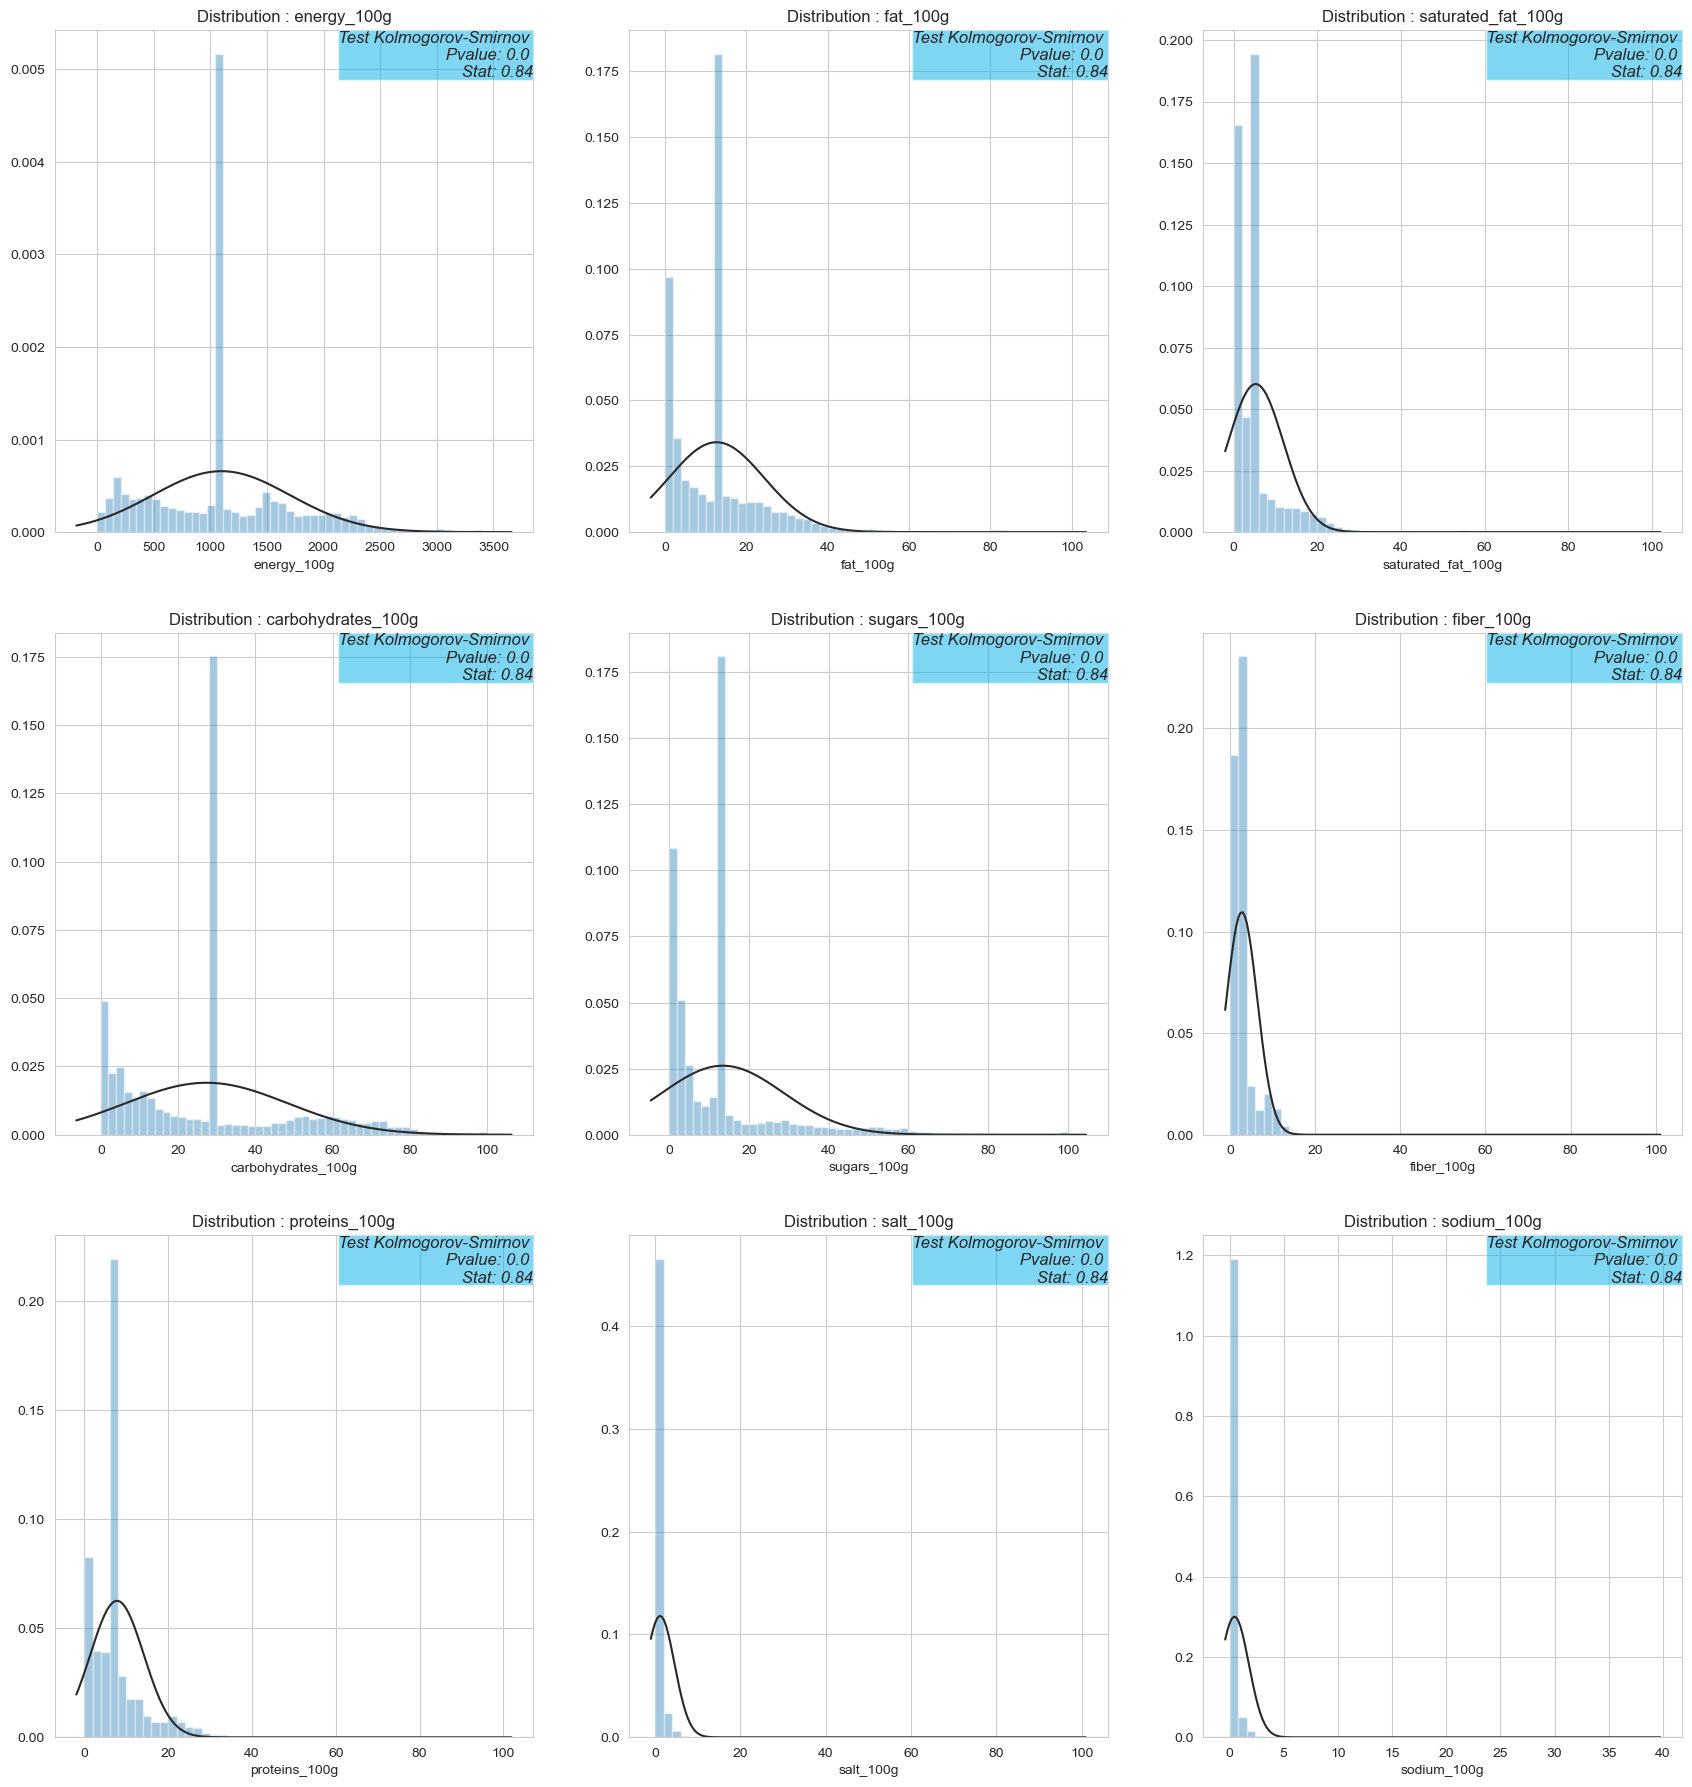

In [102]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(variable_quantitative)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = variable_quantitative[i]
    kstest = stats.kstest(data[colonne].notnull(),'norm')
    ax = sns.distplot(data[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

Les variables imputées étant bien distribuées conformément aux variables d'origine, On peut procéder à l'imputation des variables quantitatives.

**Traitement des valeurs manquantes : variables qualitatives**

**_Variable product name_**

Les produits n'ayant pas de noms n'ont aucun intérêt pour notre projet. Le choix est fait de les supprimer

In [103]:
data= data.dropna(subset="product_name")
data.shape

(90970, 19)

**_pnns_groups_1_**
Je vais imputer les valeurs manquantes par la valeur modale (mode).

In [104]:
# Nombre de valeurs manquantes pour la variable pnns_groups_1
data["pnns_groups_1"].isnull().sum()

39117

<AxesSubplot:>

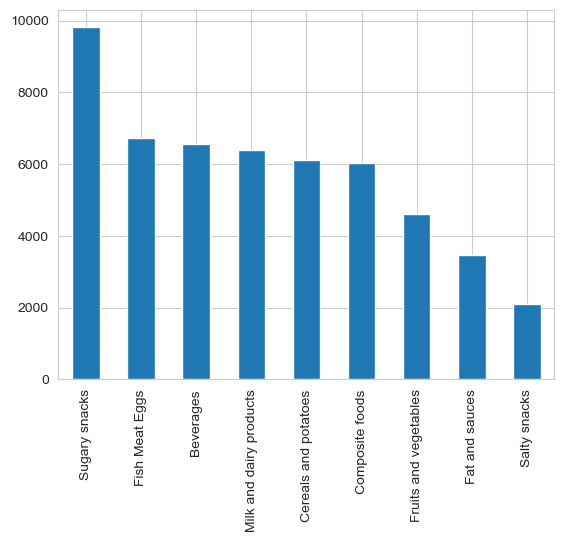

In [105]:
# Visualisation graphique avant imputation
data["pnns_groups_1"].value_counts().plot.bar()

In [106]:
# Recherche de la valeur modale pour cette variable
data["pnns_groups_1"].mode()

0    Sugary snacks
Name: pnns_groups_1, dtype: object

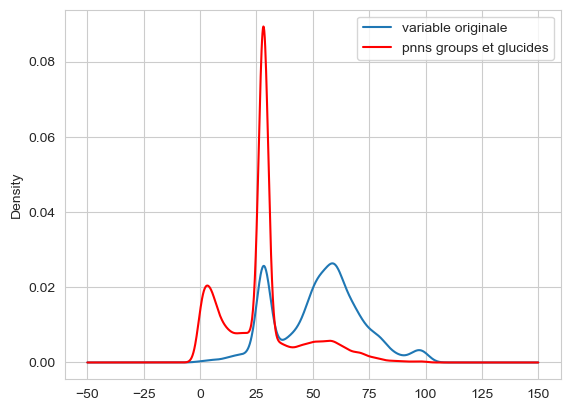

In [107]:
# Comparaison de la distribution de la variable pnns_groups_1 (avant imputation) à celle de la variable carbohydrates_100g

fig = plt.figure()
ax = fig.add_subplot(111)

data[data["pnns_groups_1"]=="Sugary snacks"]["carbohydrates_100g"].plot(kind="kde", ax=ax)

data[data["pnns_groups_1"].isnull()]["carbohydrates_100g"].plot(kind="kde", ax=ax, color="red")

lines, labels, =ax.get_legend_handles_labels()
labels = ["variable originale", "pnns groups et glucides"]
ax.legend(lines, labels, loc="best")

In [108]:
# Imputation par la valeur modale
data["pnns_groups_1"].fillna("Sugary snacks", inplace=True)

<AxesSubplot:>

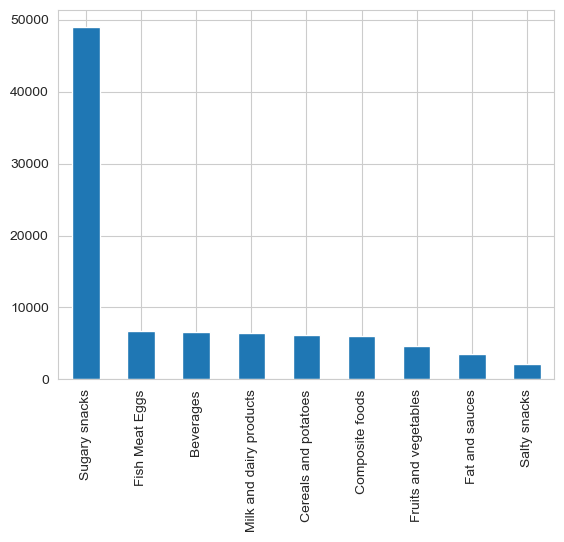

In [109]:
# Visualisation graphique après imputation
data["pnns_groups_1"].value_counts().plot.bar()

L'imputation semble avoir un gros impact sur la catégorie "sugary snacks". <br>Je procède à la vérification de la qualité de l'imputation en comparant de nouveau les distrubutions.

In [110]:
temp = data[data["pnns_groups_1"]=="Sugary snacks"]["carbohydrates_100g"]

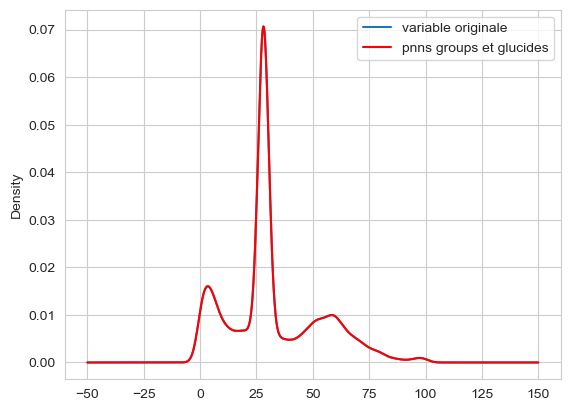

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind="kde", ax=ax)

data[data["pnns_groups_1"]=="Sugary snacks"]["carbohydrates_100g"].plot(kind="kde", ax=ax, color="red")


lines, labels, =ax.get_legend_handles_labels()
labels = ["variable originale", "pnns groups et glucides"]
ax.legend(lines, labels, loc="best")

Les distributions sont similaires. On peut en déduire que l'imputation ne modifie pas la qualité des données.

**_pnns_groups_2_**
Je procède la même manière que pour la variable "pnns_groups_1"

<AxesSubplot:>

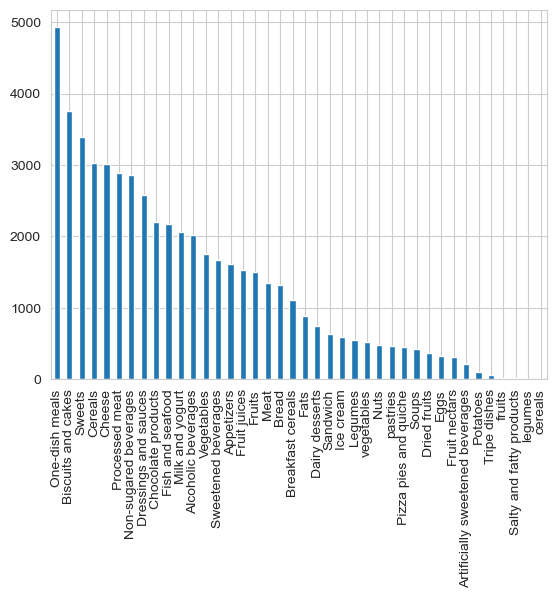

In [112]:
# Visualisation graphique avant imputation
data["pnns_groups_2"].value_counts().plot.bar()

In [113]:
# Recherche de la valeur modale pour cette variable
data["pnns_groups_2"].mode()

0    One-dish meals
Name: pnns_groups_2, dtype: object

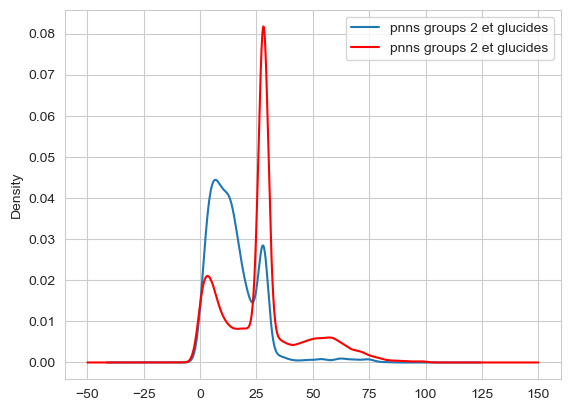

In [114]:
# Comparaison de la distribution de la variable pnns_groups_2 (avant imputation) à celle de la variable carbohydrates_100g

fig = plt.figure()
ax = fig.add_subplot(111)

data[data["pnns_groups_2"]=="One-dish meals"]["carbohydrates_100g"].plot(kind="kde", ax=ax)

data[data["pnns_groups_2"].isnull()]["carbohydrates_100g"].plot(kind="kde", ax=ax, color="red")

lines, labels, =ax.get_legend_handles_labels()
labels = ["pnns groups 2 et glucides", "pnns groups 2 et glucides"]
ax.legend(lines, labels, loc="best")

In [115]:
# Imputation par la valeur modale
data["pnns_groups_2"].fillna("One-dish meals", inplace=True)

<AxesSubplot:>

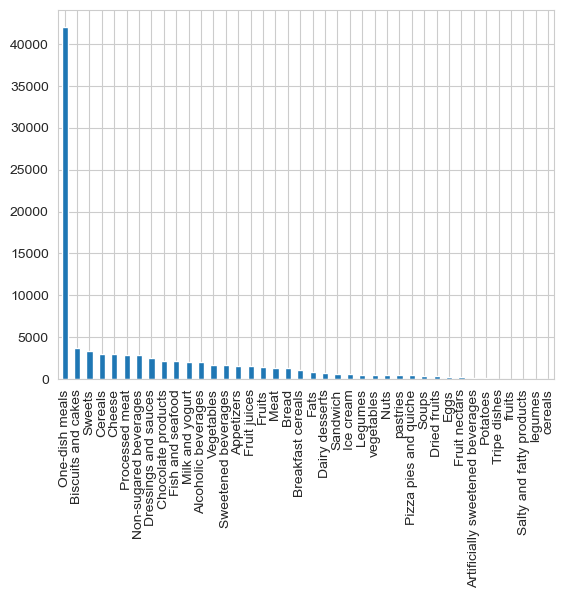

In [116]:
# Visualisation graphique après imputation
data["pnns_groups_2"].value_counts().plot.bar()

Vérification de la qualité de l'imputation.

In [117]:
temp_1 = data[data["pnns_groups_2"]=="One-dish meals"]["carbohydrates_100g"]

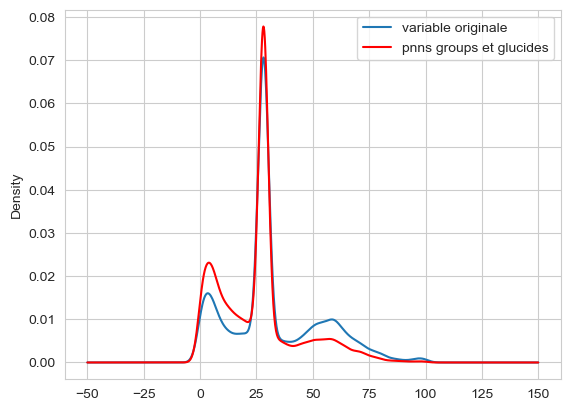

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind="kde", ax=ax)

data[data["pnns_groups_2"]=="One-dish meals"]["carbohydrates_100g"].plot(kind="kde", ax=ax, color="red")


lines, labels, =ax.get_legend_handles_labels()
labels = ["variable originale", "pnns groups et glucides"]
ax.legend(lines, labels, loc="best")

In [119]:
# pourcentage de valeurs manquantes par variables
valeur_manquante = data.isnull().sum()
pourcentage = 100*(valeur_manquante)/len(data)
table = pd.concat([valeur_manquante, pourcentage.round(2)], axis=1)
table.columns = ["Nombres de valeurs manquantes","% de valeurs manquantes"]
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values("% de valeurs manquantes", ascending=False)
                .style.background_gradient("seismic"))

**Nutrition score**

Une des variables primoridale pour notre application est le Nutriscore. Car, les personnes atteintes de Leucinose doivent avoir une alimentation globale saine. <br> Or, cette variable compte jusqu'à 38% de valeurs manquantes. Pour imputer ces valeurs manquantes, on effectuera un calcul à partir de la formule indiquée dans le tableau ci-dessous. 

Les variables utiles pour ce calcul sont : fibres, protéines, fruits et légumes, énergie, acide gras saturés, sucres, sel.

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur (nutrigrade) comme indiquée dans le deuxième tableau ci-dessous.

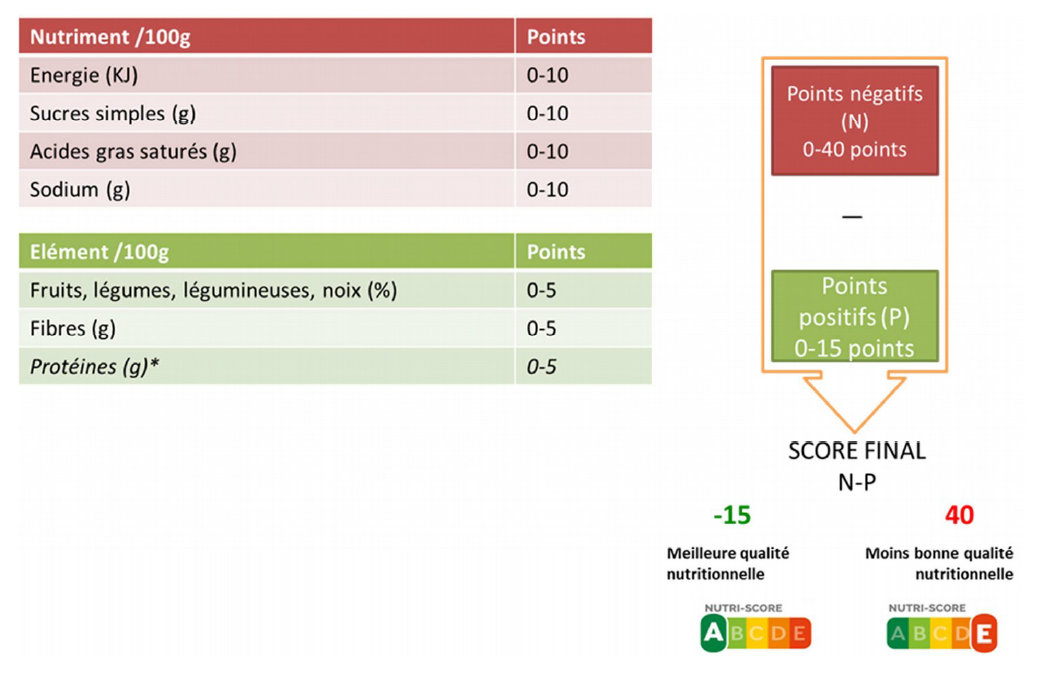

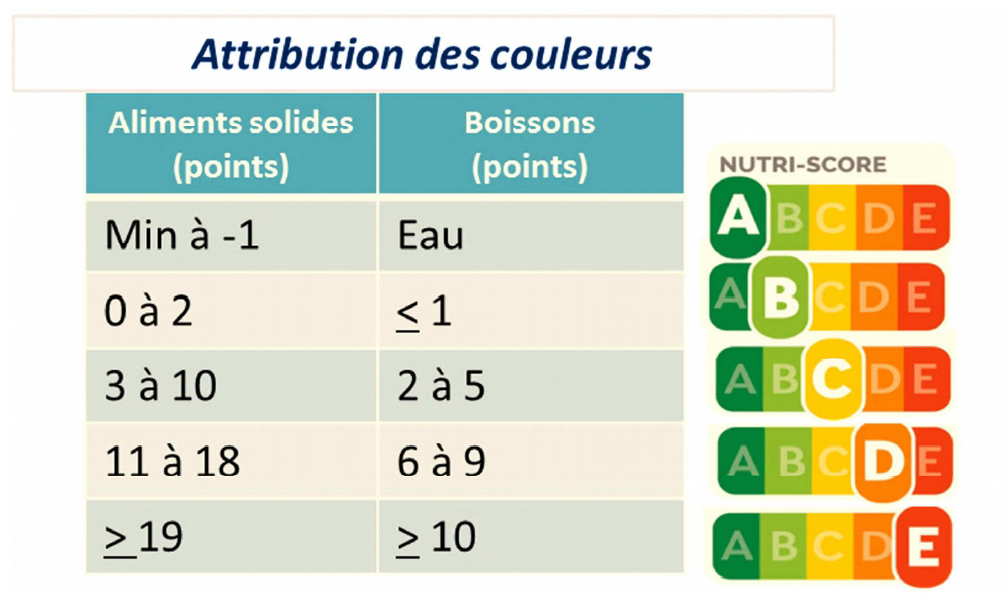

In [120]:
# Sélection des variables utiles au calcul du nutri score
nutriscore_features = ['pnns_groups_1', 'pnns_groups_2', 'nutrition_grade_fr', 'nutrition_score_fr_100g',
                       'energy_100g','sugars_100g','saturated_fat_100g','sodium_100g', 'fiber_100g', 'proteins_100g']
data[nutriscore_features].sample(10)

pnns_groups_1          pnns_groups_2 nutrition_grade_fr  \
246932            Sugary snacks         One-dish meals                  e   
203451            Sugary snacks         One-dish meals                NaN   
293037            Sugary snacks         One-dish meals                NaN   
188357            Sugary snacks         One-dish meals                NaN   
192105                Beverages  Non-sugared beverages                NaN   
237307            Sugary snacks         One-dish meals                  b   
213435           Fat and sauces   Dressings and sauces                NaN   
205706            Sugary snacks         One-dish meals                  a   
199391  Milk and dairy products                 Cheese                  d   
247247                Beverages  Non-sugared beverages                  b   

        nutrition_score_fr_100g  energy_100g  sugars_100g  saturated_fat_100g  \
246932                     24.0  1506.000000    87.000000            0.120000   
203451                      NaN  1097.545074    13.415905            5.276107   
293037                      NaN  1097.545074    13.415905            5.276107   
188357                      NaN  1097.545074    13.415905            5.276107   
192105                      NaN   998.200000    15.484000            0.422000   
237307                      0.0  1297.000000     9.700000            0.700000   
213435                      NaN  1097.545074    13.415905            5.276107   
205706                     -3.0   180.000000     6.700000            0.300000   
199391                     14.0  1266.000000     0.200000           18.700000   
247247                     -2.0   120.000000     5.500000            0.000000   

        sodium_100g  fiber_100g  proteins_100g  
246932     2.755945    0.000000       0.500000  
203451     0.469009    2.559801       7.769631  
293037     0.469009    2.559801       7.769631  
188357     0.469009    2.559801       7.769631  
192105     0.000650    2.540000       8.630000  
237307     0.011811    0.000000      32.500000  
213435     0.469009    2.559801       7.769631  
205706     0.051181    2.300000       2.300000  
199391     0.590551    0.000000      17.000000  
247247     0.011811    0.920000       0.600000

La variable indiquant la proportion de fruit et légumes des produits a été supprimée car très peu renseignée. Nous allons donc tenter de l'estimer en fonction de la catégorie :

In [121]:
data.pnns_groups_2.unique()

array(['One-dish meals', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat', 'Soups',
       'Chocolate products', 'Cheese', 'Sweets', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Alcoholic beverages', 'Cereals',
       'Vegetables', 'Bread', 'Processed meat', 'vegetables', 'Ice cream',
       'Fish and seafood', 'pastries', 'Milk and yogurt',
       'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products', 'fruits', 'legumes',
       'cereals'], dtype=object)

In [122]:
high_rate_fruit = ['Legumes','Dried fruits', 'Vegetables','Fruits', 'Soups','potatoes','Fruit juices',
                   'Fruit nectars', 'legumes', 'nuts']

medium_rate_fruit = ['Dressings and sauces', 'Pizza pies and quiche']

low_rate_fruit = ['Biscuits and cakes', 'Sweets','Non-sugared beverages', 'Sweetened beverages', 'Meat',
                  'One-dish meals','Chocolate products', 'Alcoholic beverages','Fish and seafood', 'Cheese', 
                  'Cereals', 'Appetizers','Bread', 'Fats','Processed meat', 'Breakfast cereals', 'Eggs','offals', 
                  'Milk and yogurt', 'cereals', 'Artificially sweetened beverages', 'Potatoes', 'Tripe dishes', 
                  'Salty and fatty products', 'Sweetened beverages', 'Ice cream', 'pastries', 'Dairy desserts']

In [123]:
data['fruits-vegetables-nuts_100g'] = [81 if cat in high_rate_fruit else 45 if cat 
                                       in medium_rate_fruit else 25 for cat in data.pnns_groups_2]

In [124]:
# fonction de calcul du nutri score
def calc_globalscore(row):
   
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 670)):
        a = 1
    elif ((row["energy_100g"] > 670) & (row["energy_100g"] <= 1005)):
        a = 2
    elif ((row["energy_100g"] > 1005) & (row["energy_100g"] <= 1340)):
        a = 3
    elif ((row["energy_100g"] > 1340) & (row["energy_100g"] <= 1675)):
        a = 4
    elif ((row["energy_100g"] > 1675) & (row["energy_100g"] <= 2010)):
        a = 5
    elif ((row["energy_100g"] > 2010) & (row["energy_100g"] <= 2345)):
        a = 6
    elif ((row["energy_100g"] > 2345) & (row["energy_100g"] <= 2680)):
        a = 7
    elif ((row["energy_100g"] > 2680) & (row["energy_100g"] <= 3015)):
        a = 8
    elif ((row["energy_100g"] > 3015) & (row["energy_100g"] <= 3350)):
        a = 9
    else:
        a = 10 

    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 9)):
        b = 1
    elif ((row["sugars_100g"] > 9) & (row["sugars_100g"] <= 13.5)):
        b = 2
    elif ((row["sugars_100g"] > 13.5) & (row["sugars_100g"] <= 18)):
        b = 3
    elif ((row["sugars_100g"] > 18) & (row["sugars_100g"] <= 22.5)):
        b = 4
    elif ((row["sugars_100g"] > 22.5) & (row["sugars_100g"] <= 27)):
        b = 5
    elif ((row["sugars_100g"] > 27) & (row["sugars_100g"] <= 31)):
        b = 6
    elif ((row["sugars_100g"] > 31) & (row["sugars_100g"] <= 36)):
        b = 7
    elif ((row["sugars_100g"] > 36) & (row["sugars_100g"] <= 40)):
        b = 8
    elif ((row["sugars_100g"] > 40) & (row["sugars_100g"] <= 45)):
        b = 9
    else:
        b = 10

        #saturated-fat
    if row["saturated_fat_100g"] <= 1:
        c = 0
    elif ((row["saturated_fat_100g"] > 1) & (row["saturated_fat_100g"] <= 2)):
        c = 1
    elif ((row["saturated_fat_100g"] > 2) & (row["saturated_fat_100g"] <= 3)):
        c = 2
    elif ((row["saturated_fat_100g"] > 3) & (row["saturated_fat_100g"] <= 4)):
        c = 3  
    elif ((row["saturated_fat_100g"] > 4) & (row["saturated_fat_100g"] <= 5)):
        c = 4
    elif ((row["saturated_fat_100g"] > 5) & (row["saturated_fat_100g"] <= 6)):
        c = 5
    elif ((row["saturated_fat_100g"] > 6) & (row["saturated_fat_100g"] <= 7)):
        c = 6
    elif ((row["saturated_fat_100g"] > 7) & (row["saturated_fat_100g"] <= 8)):
        c = 7
    elif ((row["saturated_fat_100g"] > 8) & (row["saturated_fat_100g"] <= 9)):
        c = 8
    elif ((row["saturated_fat_100g"] > 9) & (row["saturated_fat_100g"] <= 10)):
        c = 9
    else:
        c = 10
        
    #sodium
    if (row["sodium_100g"]/1000) <= 90:
        d = 0
    elif (((row["sodium_100g"]/1000) > 90) & ((row["sodium_100g"]/1000) <= 180)):
        d = 1
    elif (((row["sodium_100g"]/1000) > 180) & ((row["sodium_100g"]/1000) <= 270)):
        d = 2
    elif (((row["sodium_100g"]/1000) > 270) & ((row["sodium_100g"]/1000) <= 360)):
        d = 3
    elif (((row["sodium_100g"]/1000) > 360) & ((row["sodium_100g"]/1000) <= 450)):
        d = 4
    elif (((row["sodium_100g"]/1000) > 450) & ((row["sodium_100g"]/1000) <= 540)):
        d = 5
    elif (((row["sodium_100g"]/1000) > 540) & ((row["sodium_100g"]/1000) <= 630)):
        d = 6
    elif (((row["sodium_100g"]/1000) > 630) & ((row["sodium_100g"]/1000) <= 720)):
        d = 7
    elif (((row["sodium_100g"]/1000) > 720) & ((row["sodium_100g"]/1000) <= 810)):
        d = 8
    elif (((row["sodium_100g"]/1000) > 810) & ((row["sodium_100g"]/1000) <= 900)):
        d = 9
    else:
        d = 10
        
    #fruits-vegetables-rate
    if row["fruits-vegetables-nuts_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-nuts_100g"] > 40) & (row["fruits-vegetables-nuts_100g"] <= 60)):
        e = -1
    elif ((row["fruits-vegetables-nuts_100g"] > 60) & (row["fruits-vegetables-nuts_100g"] <= 80)):
        e = -2
    else:
        e = -5
        
    #fiber
    if row["fiber_100g"] <= 0.9:
        f = 0
    elif ((row["fiber_100g"] > 0.9) & (row["fiber_100g"] <= 1.9)):
        f = -1
    elif ((row["fiber_100g"] > 1.9) & (row["fiber_100g"] <= 2.8)):
        f = -2
    elif ((row["fiber_100g"] > 2.8) & (row["fiber_100g"] <= 3.7)):
        f = -3
    elif ((row["fiber_100g"] > 3.7) & (row["fiber_100g"] <= 4.7)):
        f = -4
    else:
        f = -5
        
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 3.2)):
        g = -1
    elif ((row["proteins_100g"] > 3.2) & (row["proteins_100g"] <= 4.8)):
        g = -2
    elif ((row["proteins_100g"] > 4.8) & (row["proteins_100g"] <= 6.4)):
        g = -3
    elif ((row["proteins_100g"] > 6.4) & (row["proteins_100g"] <= 8.0)):
        g = -4
    else:
        g = -5
    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score       

In [125]:
#Nutriscore
def calc_nutriscore(row):
    if row["calc_global_score"] <= -1 :
        nutriscore = "a"
    elif ((row["calc_global_score"] >= 0) & (row["calc_global_score"] <=2)) :
        nutriscore = "b"
    elif ((row["calc_global_score"] > 2) & (row["calc_global_score"] <= 10)) :
        nutriscore = "c"
    elif ((row["calc_global_score"] > 10) & (row["calc_global_score"] < 18)) :
        nutriscore = "e"
    else:
        nutriscore = "f"
        
    return nutriscore

In [126]:
data['calc_global_score'] = data.apply(lambda row: calc_globalscore(row),axis=1)
data['calc_nutriscore'] = data.apply(lambda row: calc_nutriscore(row),axis=1)

In [127]:
nutriscore_features.append('calc_global_score')
nutriscore_features.append('calc_nutriscore')

In [128]:
data[nutriscore_features].sample(10)

pnns_groups_1       pnns_groups_2 nutrition_grade_fr  \
250980    Sugary snacks      One-dish meals                  d   
244049    Sugary snacks      One-dish meals                  c   
236280   Fish Meat Eggs                Meat                  d   
203240  Composite foods            Sandwich                  c   
227497        Beverages        Fruit juices                  d   
180343    Sugary snacks      One-dish meals                  d   
286252    Sugary snacks  Chocolate products                NaN   
318515    Sugary snacks      One-dish meals                NaN   
189635    Sugary snacks  Chocolate products                  c   
249978    Sugary snacks      One-dish meals                NaN   

        nutrition_score_fr_100g  energy_100g  sugars_100g  saturated_fat_100g  \
250980                     14.0  1674.000000   100.000000            0.000000   
244049                      5.0   686.000000     0.100000            2.950000   
236280                     11.0   408.000000     3.300000            0.500000   
203240                      5.0  1160.000000     2.390000            3.890000   
227497                      6.0   214.000000    12.000000            0.000000   
180343                     12.0  1152.000000     2.000000            1.000000   
286252                      NaN  2115.000000    45.400000           14.040000   
318515                      NaN  1097.545074    13.415905            5.276107   
189635                      3.0  1238.000000     9.500000            1.000000   
249978                      NaN  1097.545074    13.415905            5.276107   

        sodium_100g  fiber_100g  proteins_100g  calc_global_score  \
250980     0.000000    0.280000       0.000000                 14   
244049     0.629921    0.700000      10.700000                 -1   
236280     1.380000   11.160000      18.800000                 -9   
203240     0.416000   13.440000      10.600000                 -4   
227497     0.000000    0.820000       0.600000                 -3   
180343     0.885827   11.000000       9.000000                 -7   
286252     0.199969    2.420000       5.100000                 21   
318515     0.469009    2.559801       7.769631                  4   
189635     0.055118    0.400000       3.600000                  3   
249978     0.469009    2.559801       7.769631                  4   

       calc_nutriscore  
250980               e  
244049               a  
236280               a  
203240               a  
227497               a  
180343               a  
286252               f  
318515               c  
189635               c  
249978               c

In [129]:
# Vérification des erreurs d'imputation sur les scores déjà connus
df_scores = data[['nutrition_grade_fr', 'nutrition_score_fr_100g', 'calc_global_score', 'calc_nutriscore']
                ][data['nutrition_grade_fr'].isnull()==False]

from sklearn.metrics import accuracy_score

accuracy_nutrigrade = accuracy_score(df_scores['nutrition_grade_fr'].values, df_scores['calc_nutriscore'].values)
print("L'accuracy_score sur les Nutrigrades calculés est de : {:.2f} %.".format(accuracy_nutrigrade*100))

L'accuracy_score sur les Nutrigrades calculés est de : 36.13 %.


La précision du calul est faible. Les résultats obtenus ne peuvent donc pas être utilisés pour remplacer les valeurs manquantes de nutiscore et du nutrigrade.
A l'aide des algorithmes du machine learning, l'application aura aussi pour objectif de prédire le nutrigrade des produits en fonctions des caractéristiques connues.

In [130]:
# Suppression des colonnes "calc"
data.drop(["calc_global_score", "calc_nutriscore"], axis=1, inplace=True)

In [131]:
data.shape

(90970, 20)

<AxesSubplot:>

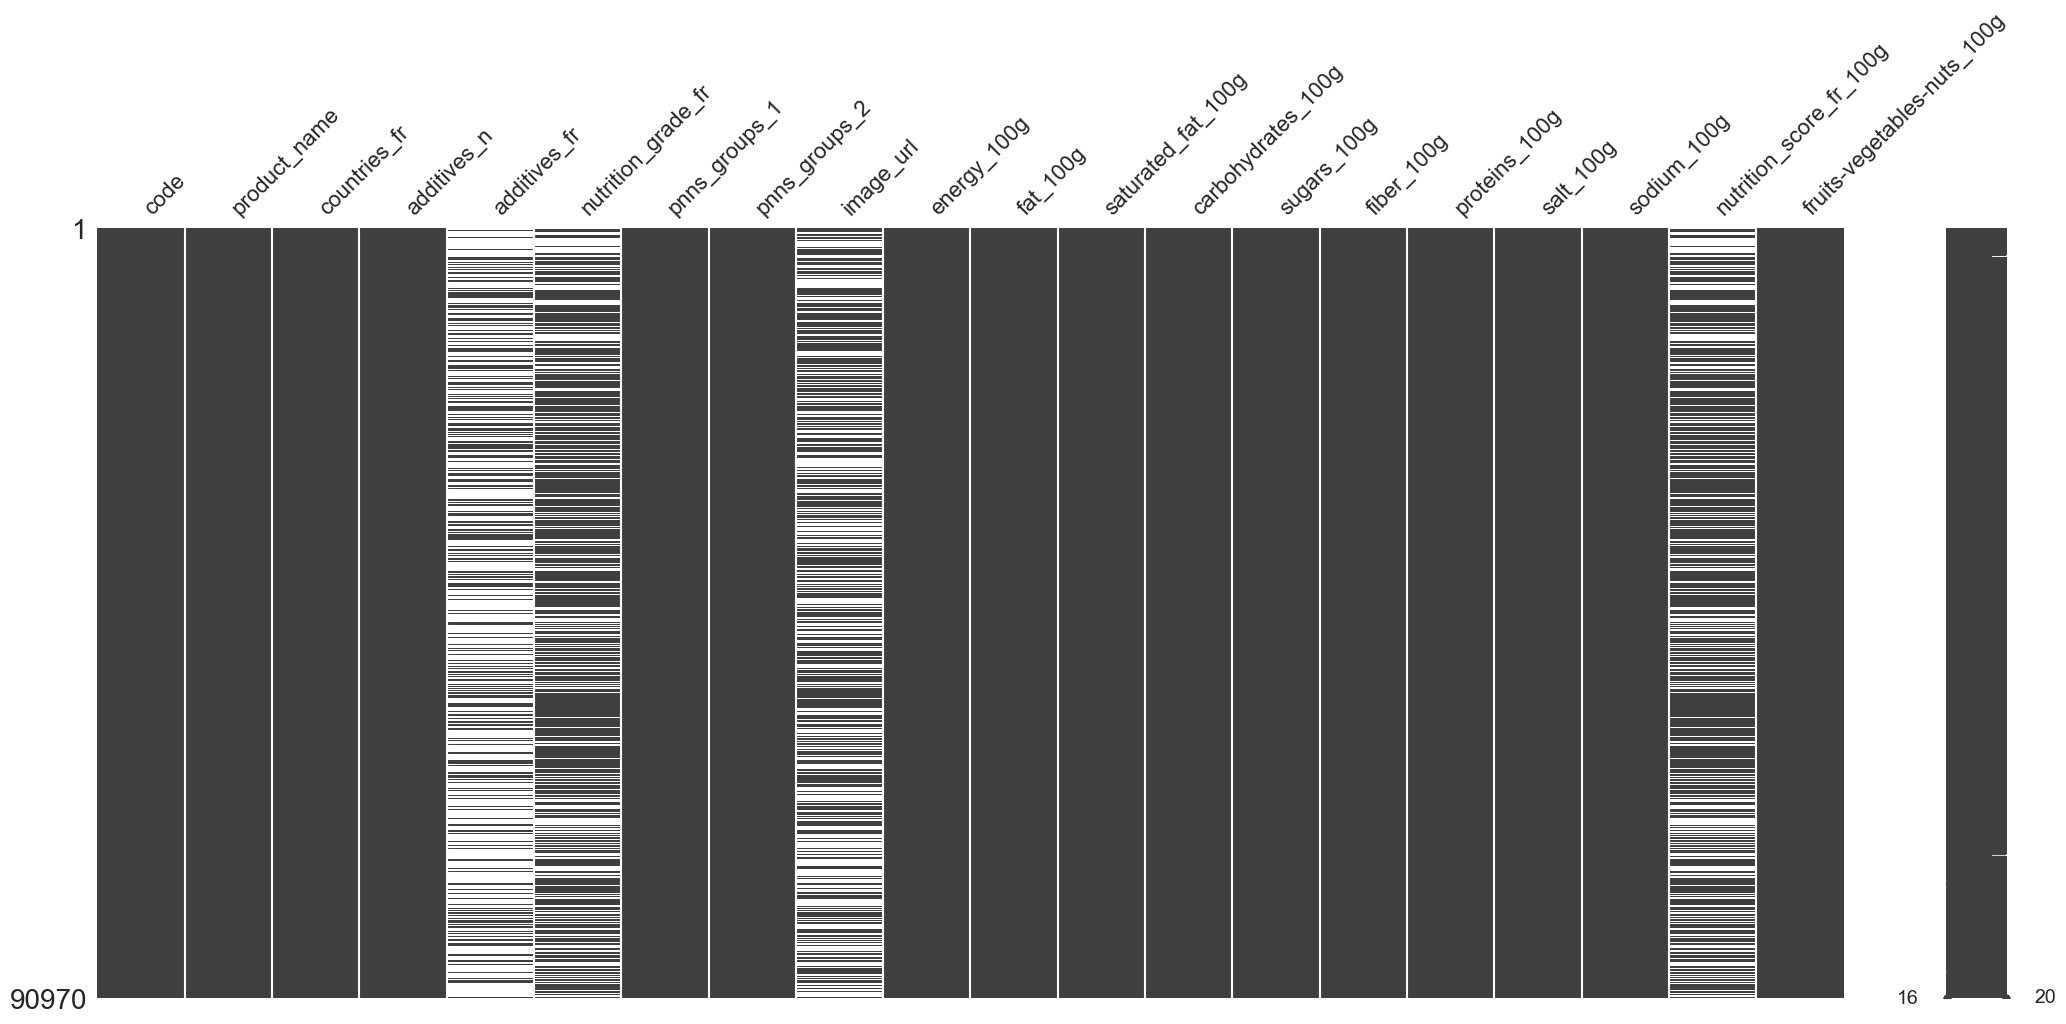

In [132]:
msno.matrix(data)

## Création du modèle de machine learning

In [133]:
# Récupération des variable contenant le mot clé "100g", nécessaire à la prédiction du nutriscore
nutri_var = []
for col in data :
    if "_100g" in col :
        nutri_var.append(col)

In [134]:
# Suppression de la variable "nutrition_score...", non utile
nutri_var.remove("nutrition_score_fr_100g")

In [135]:
# préparation des données pour la création de modèles de machine learning
y_set = data["nutrition_grade_fr"].dropna()
x_set = data.dropna(subset=["nutrition_grade_fr"])[nutri_var]

# Encodage du nutrigrade (labels [a,b,c,d,e] -> [0,1,2,3,4])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_set)

# standardisation des variables 
from sklearn.preprocessing import StandardScaler
encoder_x = StandardScaler()
x_set_encoded = encoder_x.fit_transform(x_set)

##### Sélection et entrainnement de modèles
Séparation du jeu de données en données d'entrainement et de test

In [136]:
# Séparation du jeu de données en 2, avec train_size = 80%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set_encoded, y_encoded, stratify=y_encoded ,train_size=0.8, random_state=42)

**_Précision_**

Le score de précision est établit pour chaque classe et ensuite une moyenne est faite sur l'ensemble des classes pour obtenir un score entre 0 et 1

3 modèles vont être testés (knn, random forest et gradient boosting), chacun avec une cross validation à 10 passes. Les scores seront ensuite comparés pour faire une séléction du modèle le plus performant qui, sera hyperparamétrisé pour affiner la précision du modèle.

In [137]:
accuracy = {}

##### Modèle K-NN

In [138]:
# Entraînement d'un modèle k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()

accuracy["knn"] = cross_val_score(knn_clf, x_train, y_train, cv=10)


print("Accuracy for a k-NN on validation dataset : {:.2f} %".format(100*accuracy["knn"].mean()))

C:\Users\alain\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alain\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy for a k-NN on validation dataset : 82.71 %


C:\Users\alain\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Modèle Random Forest

In [139]:
# Entraînement d'un modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=20, random_state=42)

accuracy["random_forest"] = cross_val_score(forest_clf, x_train, y_train, cv=10)


print("Accuracy for a Random Forest Algorithm on validation dataset : {:.2f} %".format(100*accuracy["random_forest"].mean()))

Accuracy for a Random Forest Algorithm on validation dataset : 88.67 %


##### Modèle Gradient Boosting

In [140]:
# entraînement d'un modèle Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_clf = GradientBoostingClassifier(n_estimators=50)

accuracy["gradient_boosting"] = cross_val_score(gb_clf, x_train, y_train, cv=10)


print("Accuracy for a Boosting Gradient on validation dataset : {:.2f} %".format(100*accuracy["gradient_boosting"].mean()))

Accuracy for a Boosting Gradient on validation dataset : 77.07 %


##### Sélection du meileur modèle
 Le meilleur modèle est celui avec la plus grande précision(accuracy) et la plus petite variance.

In [141]:
print("La performance du modèle k-neighbors est d'environ : {:.2f} % +- {:.2f} %".format(100*accuracy["knn"].mean(), 100*accuracy["knn"].std()))
print("La performance du modèle Random Forest est d'environ : {:.2f} % +- {:.2f} %".format(100*accuracy["random_forest"].mean(), 100*accuracy["random_forest"].std()))
print("La performance du modèle Gradient Boosting est d'environ : {:.2f} % +- {:.2f} %".format(100*accuracy["gradient_boosting"].mean(), 100*accuracy["gradient_boosting"].std()))

La performance du modèle k-neighbors est d'environ : 82.71 % +- 0.41 %
La performance du modèle Random Forest est d'environ : 88.67 % +- 0.44 %
La performance du modèle Gradient Boosting est d'environ : 77.07 % +- 0.61 %


Le modèle retenu est Random Forest.

##### Réglage des hyperparamètres de Ramdom Forest
GridSearchCV est utilisé pour tester la grille d'hyperparamètres et de sélectionner celui qui donne le meilleur résultat.

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
# Grille de paramètres
param_grid = [{'max_features': [2, 3, 4, 5, 6, 7, 8], 'max_depth': range(10, 30)}]

# Recherche par quadrillage des meilleurs paramètres
grid_search = GridSearchCV(forest_clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 21, 'max_features': 5}

##### Récupération du modèle avec le meilleur score

In [144]:
best_clf = grid_search.best_estimator_

##### Application du modèle sur les données test

In [145]:
y_pred = best_clf.predict(x_test)

##### Calcul de la précision du modèle sur les données test

In [146]:
# Précision du modèle final sur le jeu test
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy for the best model on Test dataset : {:.2f} %".format(100*accuracy))

Accuracy for the best model on Test dataset : 89.18 %


##### Application au jeu de données

In [147]:
best_clf.fit(x_set_encoded, y_encoded)

RandomForestClassifier(max_depth=21, max_features=5, n_estimators=20,
                       random_state=42)

#### Analyse des erreurs
##### Matrice de confusion
Utilisons la heatmap pour une meilleure interprétation.

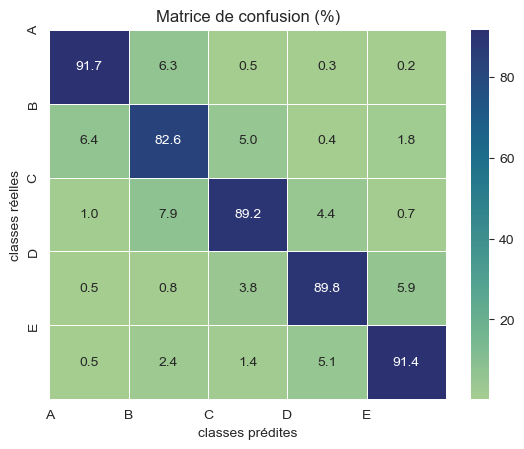

In [148]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred)

row_sums = conf_mx.sum(axis=0, keepdims=True)
norm_conf_mx = conf_mx / row_sums *100

sns.heatmap(norm_conf_mx, cmap="crest", annot=True, linewidth=.5, fmt=".1f")
plt.title("Matrice de confusion (%)")
plt.xlabel("classes prédites")
plt.ylabel("classes réelles")
plt.xticks(np.arange(5), ('A', 'B', 'C', 'D', 'E'))
plt.yticks(np.arange(5), ('A', 'B', 'C', 'D', 'E'))

plt.show()

Les taux d'erreurs les plus importants se situent entre classes voisines. Ex : B prédit en C. Peu de produits sont prédits A alors qu'ils sont C, D ou E

#### Exemple de prédiction

In [149]:
# Récupération des produits n'ayant pas de Nutri-Score
x_na = data[data.nutrition_grade_fr.isna()]

In [150]:
# 20 produits sont séléctionnés au hasard parmi ceux n'ayant pas de Nutri-Score
#La colonne Score est le résultat du modèle
index = np.random.permutation(x_na.index)[0:20]

some_products = x_na.loc[index]

some_predictions = best_clf.predict(encoder_x.transform(some_products[nutri_var]))
some_products["Score"] = encoder.inverse_transform(some_predictions)
some_products[["product_name","Score"] + nutri_var]

product_name Score  \
259749                                                 Mandelmus     b   
246443      eau de source de montagne .  source Roche des Ecrins     b   
227178                                                Pomme gala     b   
135785                                        Lamelles de Konjac     b   
254168                     Betteraves rouges cuites et épluchées     b   
238018                                          Sirop de Citron      c   
254347                                     Charlotte aux Fraises     b   
234181                                  Filets d'anchois marinés     b   
277195  Verrines (1 Campagne + 1 Foie Porc + 1 Foie de Volaille)     b   
228700                           Château Etang des Colombes 2011     b   
241454                                                     Purée     b   
245854                                  Farfalles Au blé entier      a   
203828                                           Asperges vertes     a   
174746                               Le bridé de St André le Puy     b   
269492                                          Heinz Five Beanz     b   
277394                                                     Ciney     b   
204954                                                     Curry     b   
202853                                            Collioure 2011     b   
230947                               Infusion bio verveine Pagès     b   
303021                                        Vinaigre de tomate     a   

        energy_100g   fat_100g  saturated_fat_100g  carbohydrates_100g  \
259749  1097.545074  12.982817            5.276107           28.133105   
246443  1097.545074  12.982817            5.276107           28.133105   
227178  1097.545074  12.982817            5.276107           28.133105   
135785  1097.545074  12.982817            5.276107           28.133105   
254168  1097.545074  12.982817            5.276107           28.133105   
238018  1156.000000   0.000000            0.022000           68.000000   
254347  1097.545074  12.982817            5.276107           28.133105   
234181  1097.545074  12.982817            5.276107           28.133105   
277195  1097.545074  12.982817            5.276107           28.133105   
228700  1097.545074  12.982817            5.276107           28.133105   
241454  1097.545074  12.982817            5.276107           28.133105   
245854  1525.000000  16.180000            0.450000           70.000000   
203828    75.000000   0.410000            0.120000            2.170000   
174746  1097.545074  12.982817            5.276107           28.133105   
269492  1097.545074  12.982817            5.276107           28.133105   
277394  1097.545074  12.982817            5.276107           28.133105   
204954  1097.545074  12.982817            5.276107           28.133105   
202853  1097.545074  12.982817            5.276107           28.133105   
230947  1097.545074  12.982817            5.276107           28.133105   
303021   133.000000   0.000000            0.142000            0.100000   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
259749    13.415905    2.559801       7.769631   1.191124     0.469009   
246443    13.415905    2.559801       7.769631   1.191124     0.469009   
227178    13.415905    2.559801       7.769631   1.191124     0.469009   
135785    13.415905    2.559801       7.769631   1.191124     0.469009   
254168    13.415905    2.559801       7.769631   1.191124     0.469009   
238018    40.786000    5.000000       0.000000   0.227994     0.089447   
254347    13.415905    2.559801       7.769631   1.191124     0.469009   
234181    13.415905    2.559801       7.769631   1.191124     0.469009   
277195    13.415905    2.559801       7.769631   1.191124     0.469009   
228700    13.415905    2.559801       7.769631   1.191124     0.469009   
241454    13.415905    2.559801       7.769631   1.191124     0.469009   
245854     3.000000    6.000000      12.500000   0.015

### Sauvegarde des résultats
#### Remplacement des valeurs manquantes du Nutri-Score
Les valeurs manquantes du Nutri-Score sont remplacées par les résultats de notre modèle.

In [151]:
x_na = data[data.nutrition_grade_fr.isna()][nutri_var]

y_na = best_clf.predict(x_na)
y_na = encoder.inverse_transform(y_na)

C:\Users\alain\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**_Proportion des grades nutritionnels_**

C:\Users\alain\AppData\Local\Temp\ipykernel_16180\2398267532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["nutrition_grade_fr"][data["nutrition_grade_fr"].isna()] = y_na


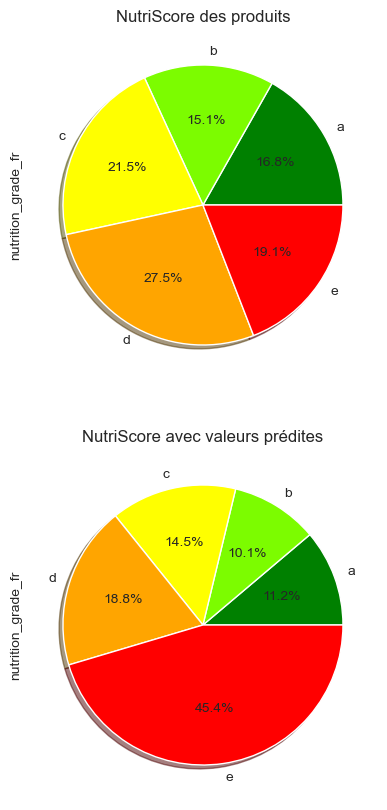

In [152]:
fig = plt.figure(1, figsize=(10,10))

# Affichage les valeurs réelles Nutri-Score
plt.subplot(211)
plt.title("NutriScore des produits")
color_list = ["green", "lawngreen", "yellow", "orange", "red"]
data["nutrition_grade_fr"].dropna().value_counts(normalize=True).sort_index().plot(kind="pie", colors=color_list, autopct='%1.1f%%', shadow=True)


# Remplacement des valeurs manquantes par les valeurs prédites du modèle
data["nutrition_grade_fr"][data["nutrition_grade_fr"].isna()] = y_na

# Affichage des Nutri-Score + résultats modèle
plt.subplot(212)
plt.title('NutriScore avec valeurs prédites')
data["nutrition_grade_fr"].value_counts(normalize=True).sort_index().plot(kind='pie', colors=color_list, autopct='%1.1f%%', shadow=True)
plt.show()

On observe une augmentation significative des produits de moins bonne qualité, noté E et diminution de la proportion des produits notés A, B et C.  Cette observation pourrait s'expliquer par le fait que les industriels préfères ne pas afficher de note nutriscore quand leurs produits sont mal notés. En effet, les nuutriscores manquants étaient très probablemennt ceux des produits de moindre qualité.<br>L'application permettra donc aux utilisateurs de savoir si les produits qu'ils désirent sont bien notés ou pas, et ce que le nutriscore soit indiqué sur l'emballage ou pas.

Maintenant que les grades nutritionnels sont déterminés pour tous les produits, on peut supprimé les variables qui désormais ne seront plus utiles : "countries_fr", "nutrition_score_fr_100g" et "fruits-vegetables-nuts_100g" ne sont plus utiles. On peut supprimer les supprimer. 

In [153]:
final_data = data.drop(columns=["countries_fr", "nutrition_score_fr_100g", "fruits-vegetables-nuts_100g"])

<AxesSubplot:>

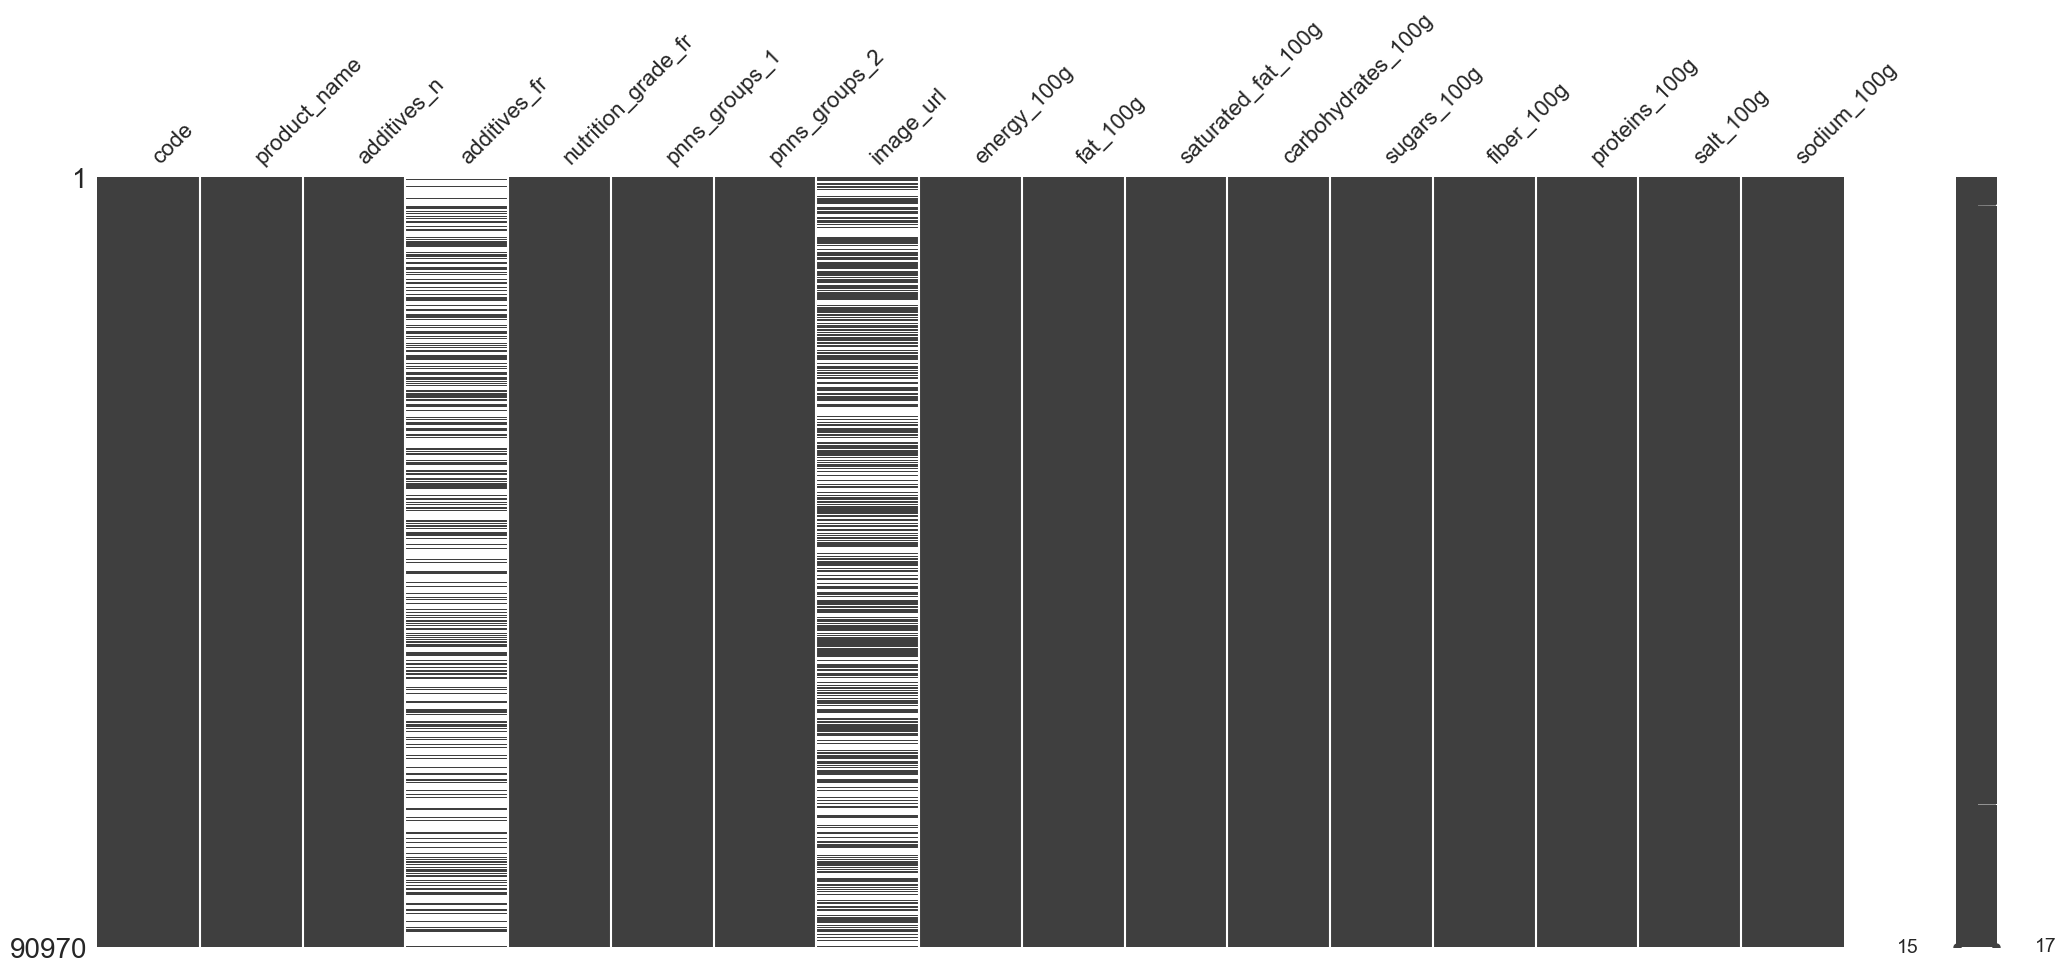

In [154]:
msno.matrix(final_data)

In [155]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90970 entries, 0 to 320770
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                90970 non-null  object 
 1   product_name        90970 non-null  object 
 2   additives_n         90970 non-null  float64
 3   additives_fr        30430 non-null  object 
 4   nutrition_grade_fr  90970 non-null  object 
 5   pnns_groups_1       90970 non-null  object 
 6   pnns_groups_2       90970 non-null  object 
 7   image_url           49939 non-null  object 
 8   energy_100g         90970 non-null  float64
 9   fat_100g            90970 non-null  float64
 10  saturated_fat_100g  90970 non-null  float64
 11  carbohydrates_100g  90970 non-null  float64
 12  sugars_100g         90970 non-null  float64
 13  fiber_100g          90970 non-null  float64
 14  proteins_100g       90970 non-null  float64
 15  salt_100g           90970 non-null  float64
 16  sod

#### Sauvegarde du jeu de données

In [156]:
final_data.to_csv("leucinose.csv", sep="\t")

# Synthèse du nettoyage
Partir d'un jeu de donnée de 320770 lignes et 162 variables, 90970 lignes et 18 colonnes ont été conservé.<br>
Les informations ont été restreintes aux produits commercialisés en France et dans les térritoires d'Outre mer.<br>
Les variables indispensables pour l'application ont été définies : 
- Les informations à affichage obligatoire sur les étiquettes alimentaires : la valeur énergétiques, la teneur en macronutriments (particulièrement les protéines pour notre application) et le sel ;
- Les additifs ;
- Le nutriscore : le choix a été fait de ne conserver que le grade nutritionnelle et de supprimer le score nutritionnel. Car, seul le grade nutritionnel est indiqué sur l'emballage et est facile à interpréter par les consommateurs ;
- Le code, utile pour le scan.